MoveNet Data

In [1]:
import sys
import os 

from utils import *

In [3]:
# dataframe functions
def prep_df(csv_file):

    kp_df = read_movenet_kps(csv_file)
    kp_df = clean_keypoints(kp_df)
    kp_df = scale_movenet_keypoints(kp_df)
    kp_df = split_x_y(kp_df)

    return kp_df

def plot_df(kp_df, pose_vars, model_title, fig_size=(30, 30), plot_color='green'):

    fig, ax = plt.subplots(nrows=len(pose_vars), ncols=2, figsize=fig_size, layout='constrained')
    fig.suptitle(f'{model_title} coordinates over time', fontsize=30)

    for i in range(len(pose_vars)):
        ax[i,0].scatter(kp_df['time'].tolist(),kp_df[f'{pose_vars[i]}_X'].tolist(), color=plot_color)
        ax[i,0].set_xlabel('time (minutes)', fontsize=18)
        ax[i,0].set_ylabel(f'x coordinate', fontsize=18)
        # ax[i,0].set_ylim([0,480])
        ax[i,0].set_title(f'{pose_vars[i]} X', fontsize=25)

        ax[i,1].scatter(kp_df['time'].tolist(),kp_df[f'{pose_vars[i]}_Y'].tolist(), color=plot_color)
        ax[i,1].set_xlabel('time (minutes)', fontsize=18)
        ax[i,1].set_ylabel(f'y coordinate', fontsize=18)
        # ax[i,1].set_ylim([0,640])
        ax[i,1].set_title(f'{pose_vars[i]} Y', fontsize=25)

    return fig, ax

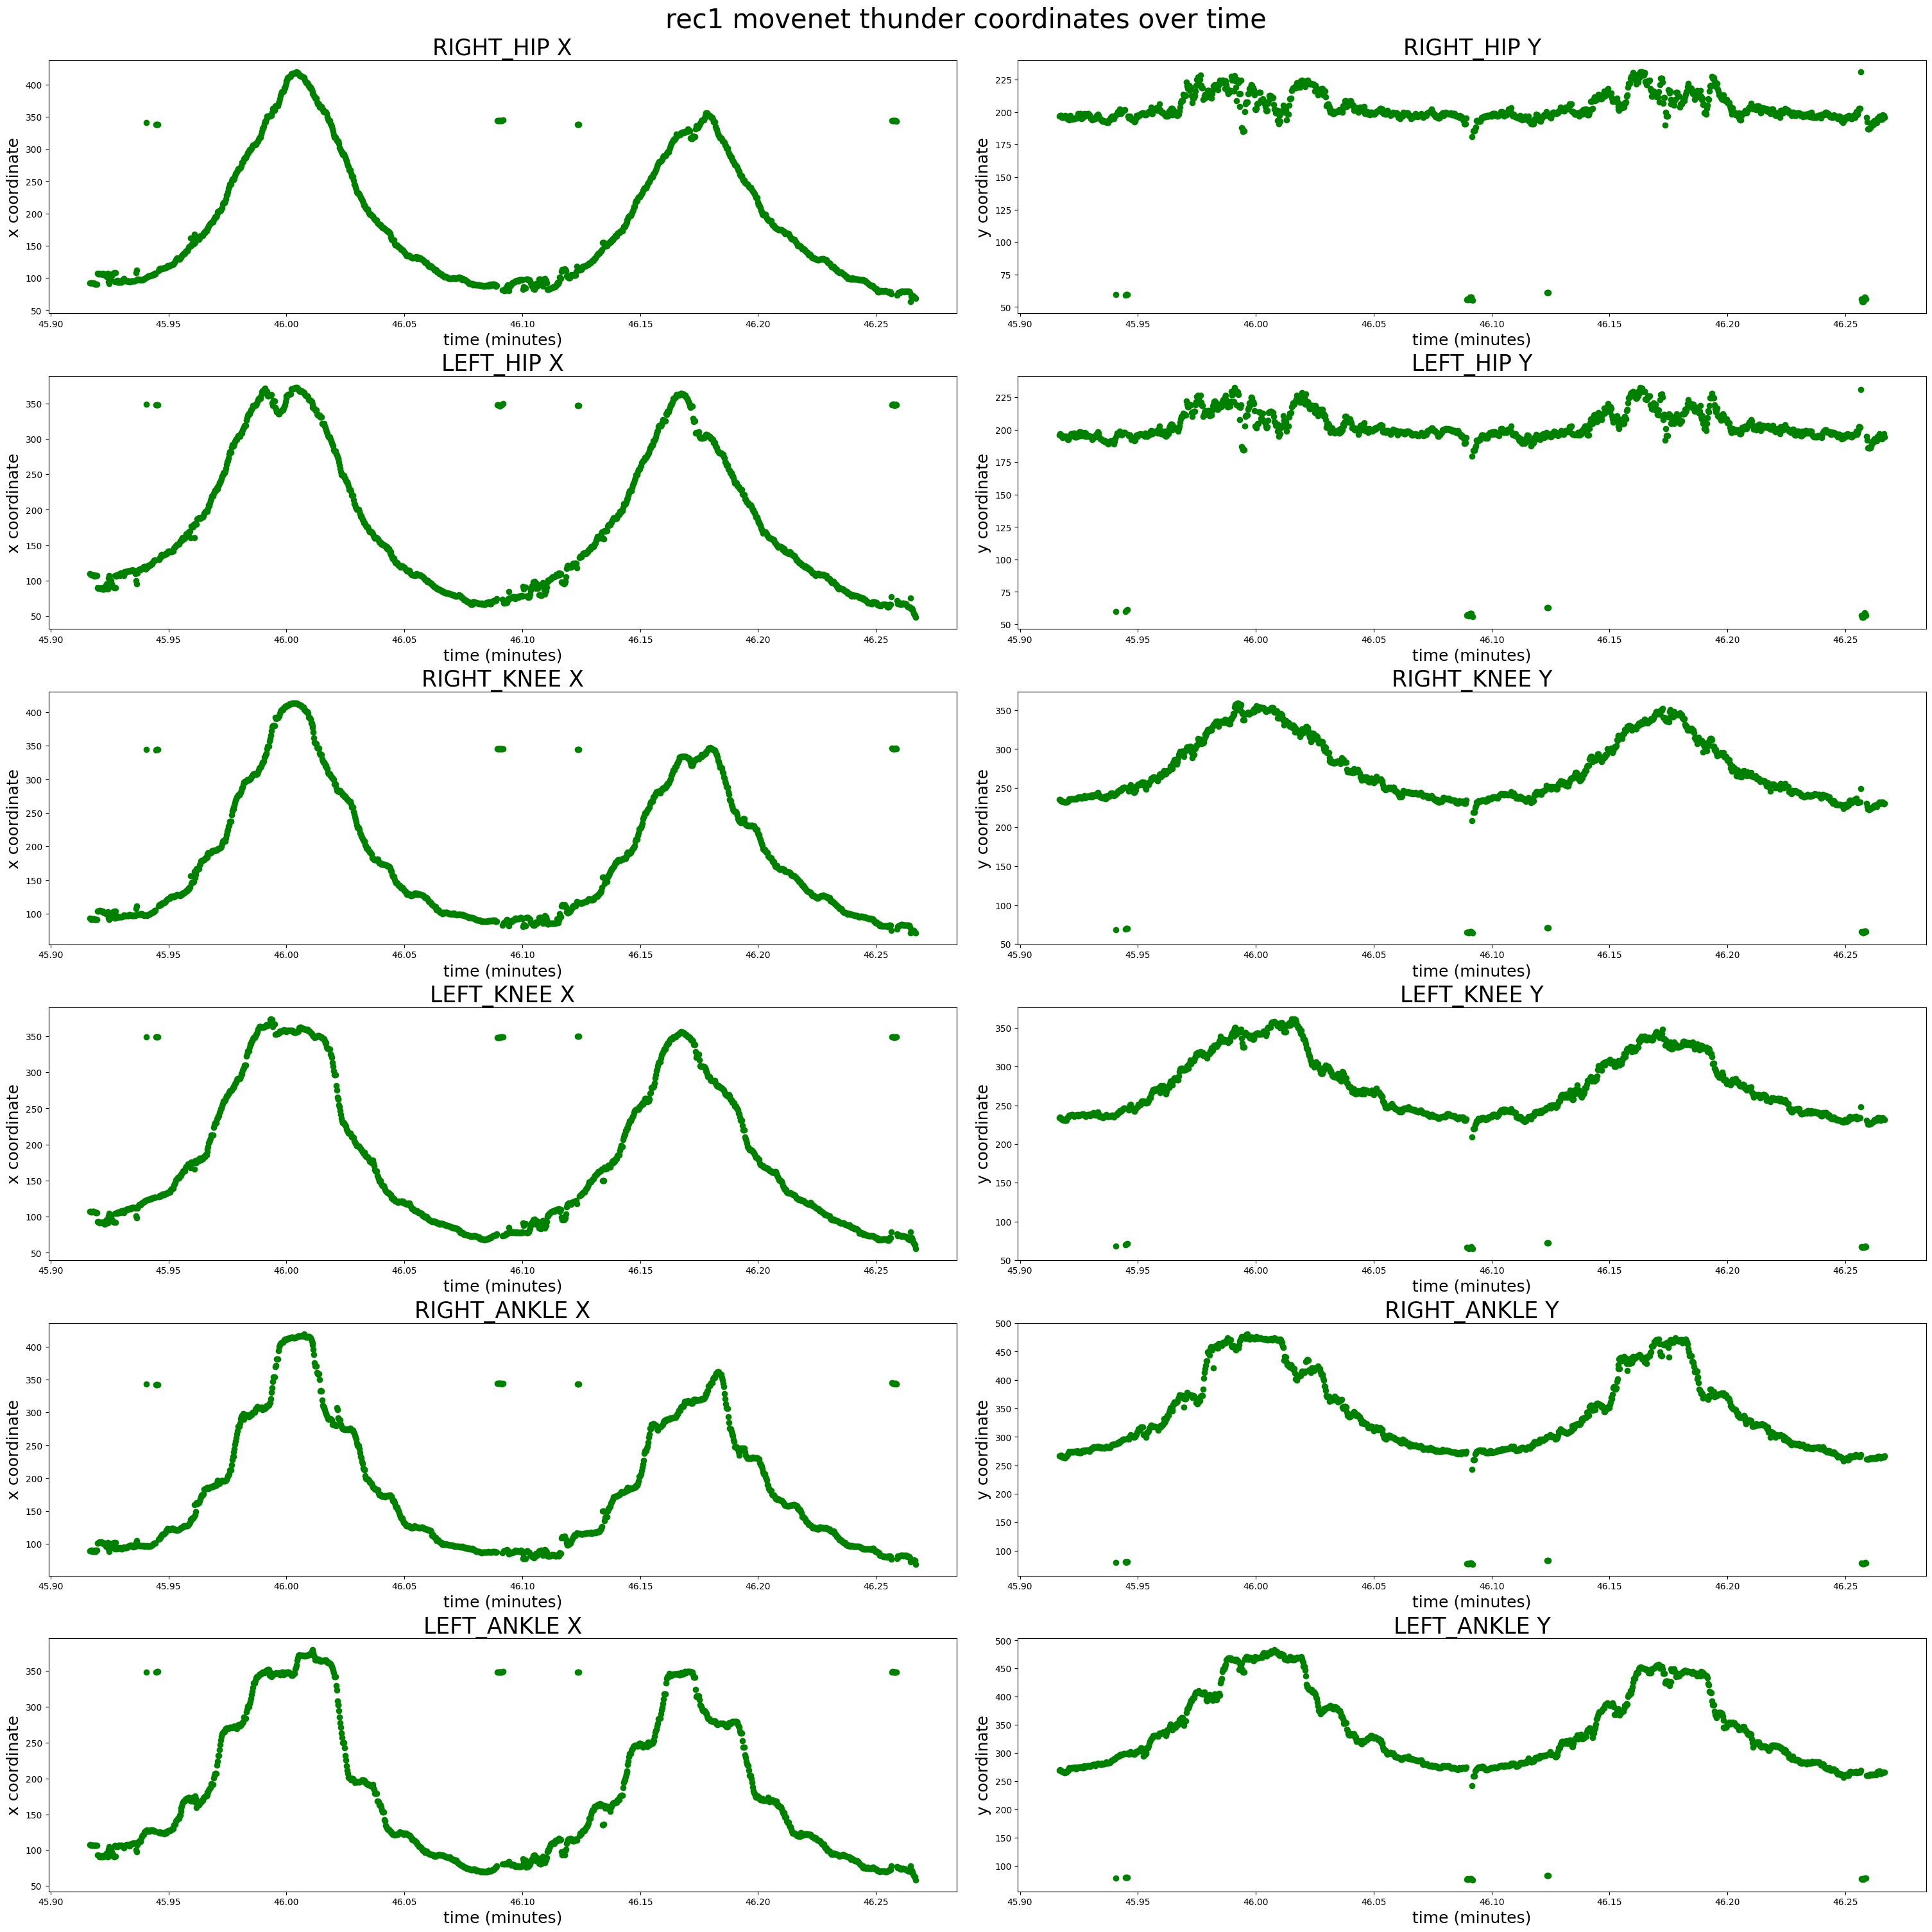

In [3]:
# plot some initial data
pose_vars = ['RIGHT_HIP', 'LEFT_HIP', 'RIGHT_KNEE', 'LEFT_KNEE', 'RIGHT_ANKLE', 'LEFT_ANKLE']
model_title = 'rec1 movenet thunder'

csv_file = 'keypoint_files/movenet/thunder/rec1_crop/movenet_rec1_crop_movenet_thunder_poses.csv'
kp_df = prep_df(csv_file)
plot_df(kp_df, pose_vars, model_title)
plt.show()

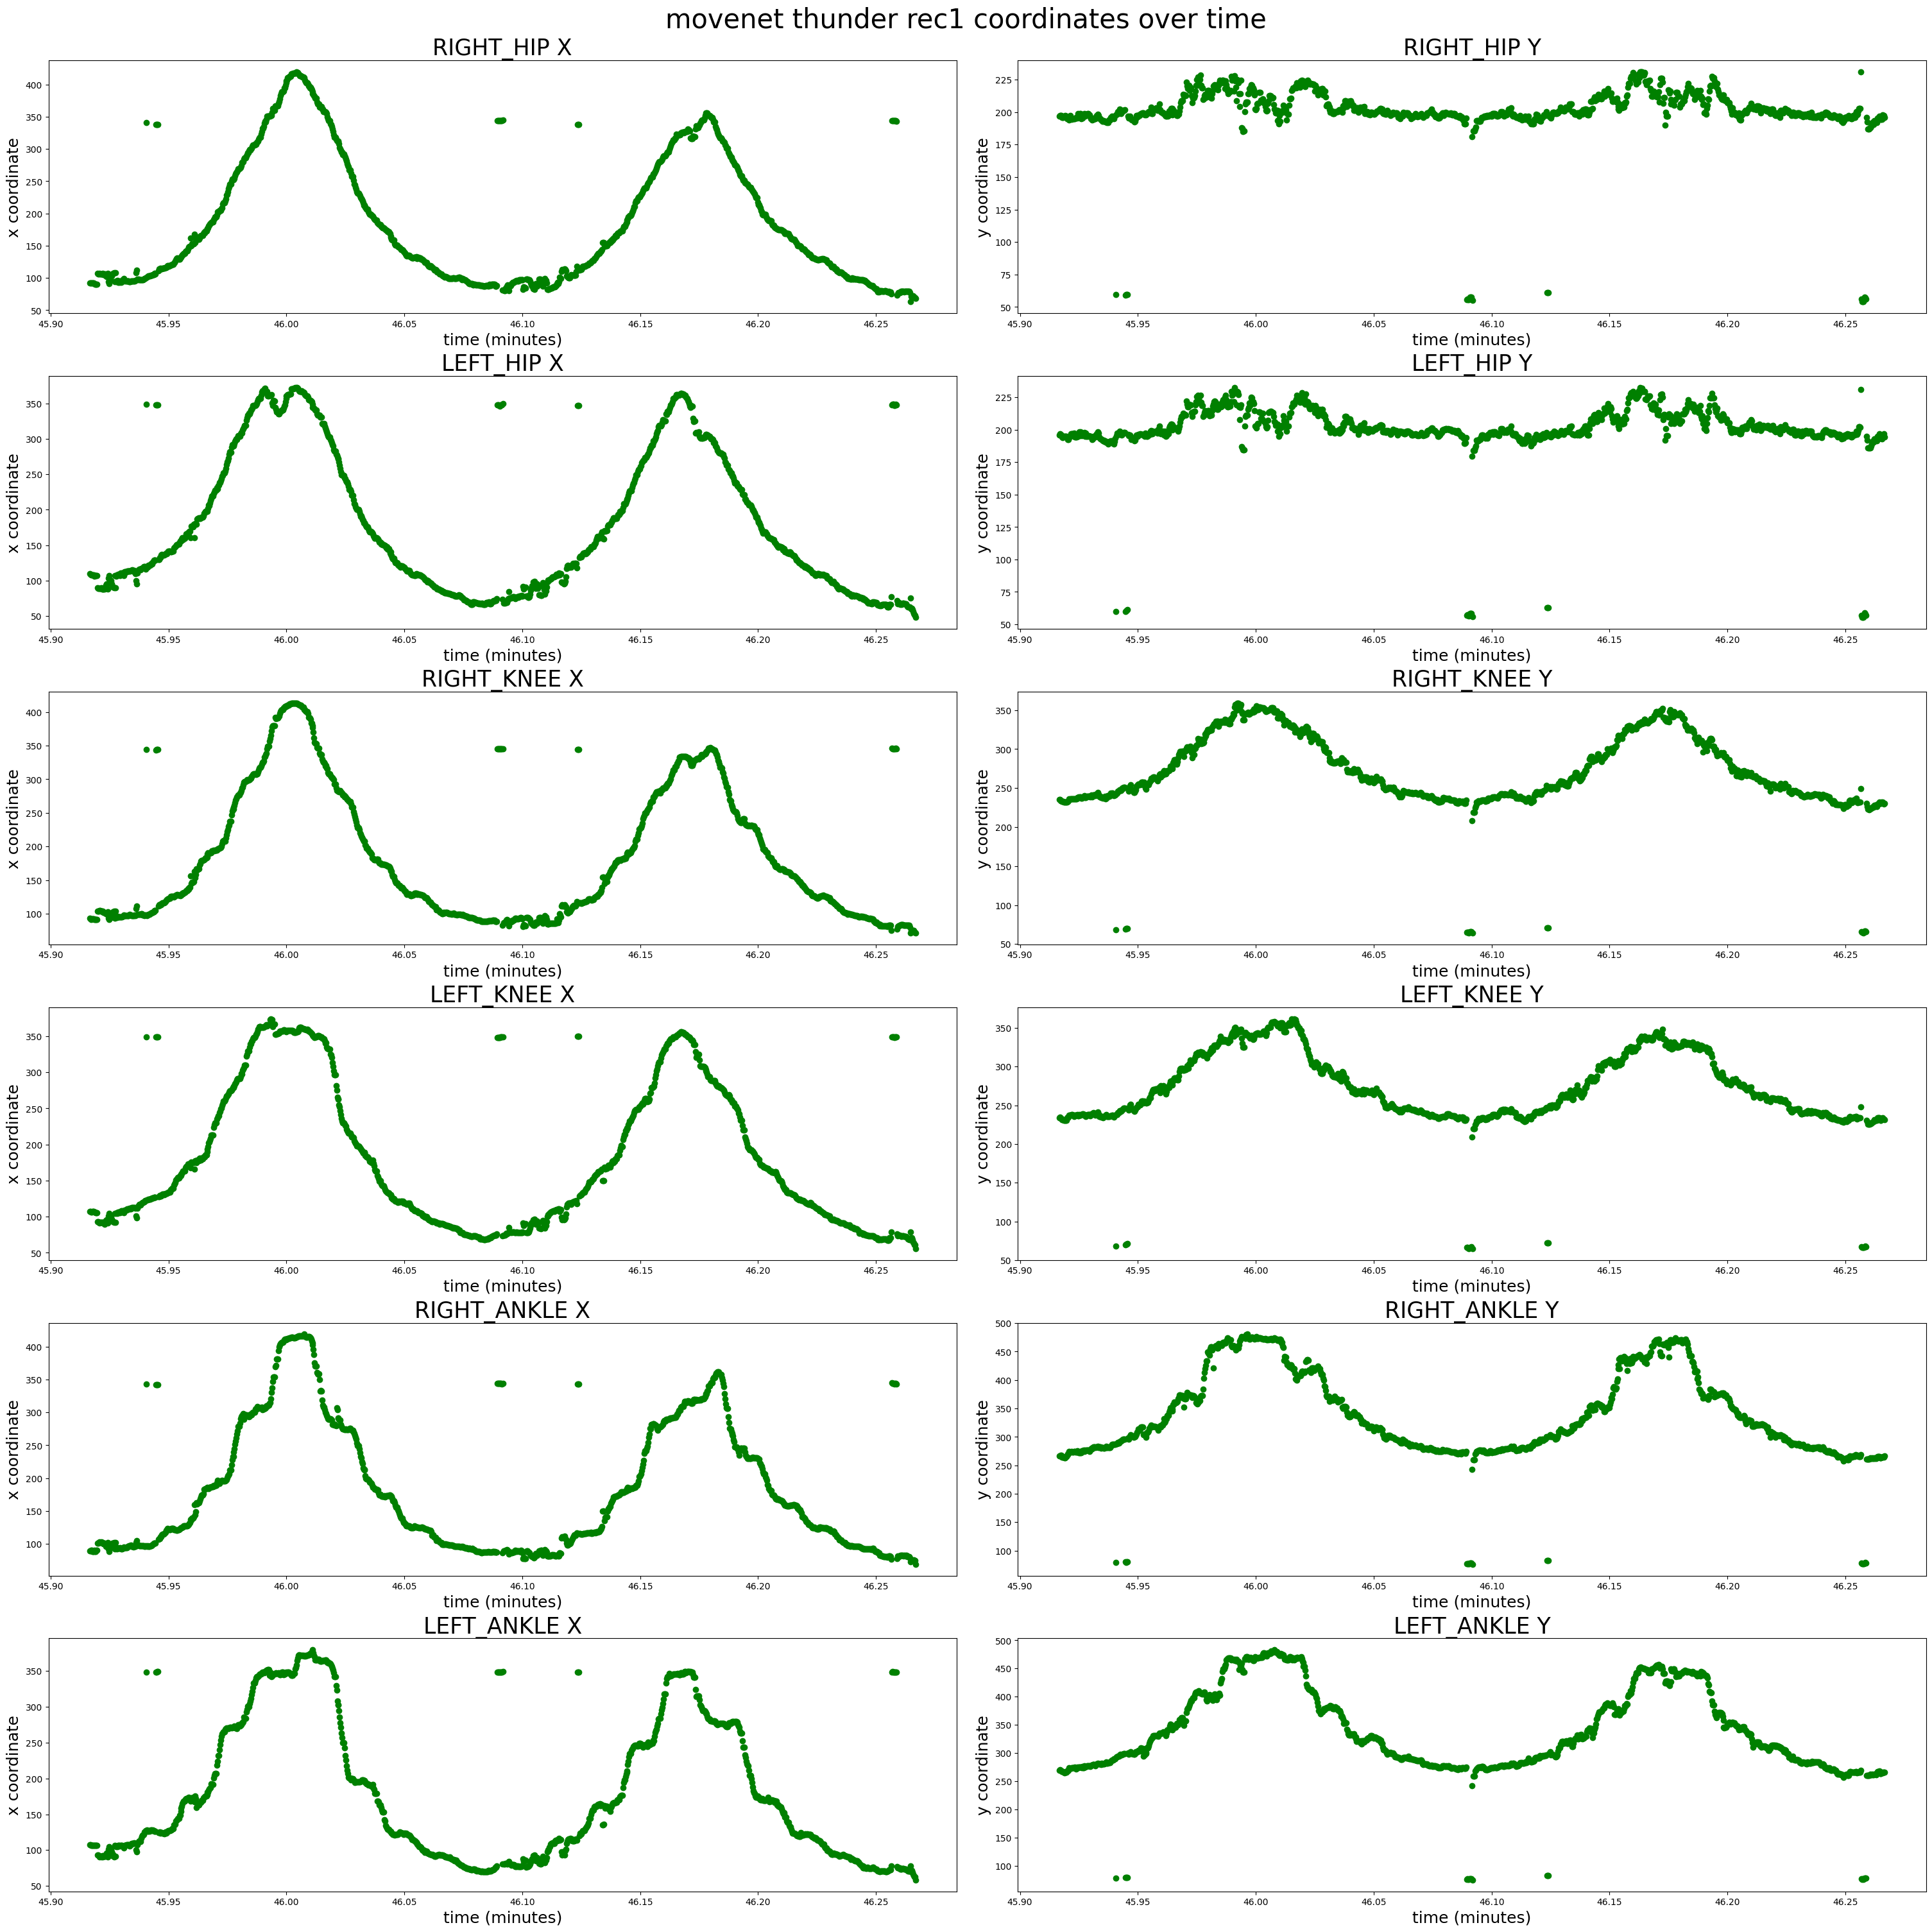

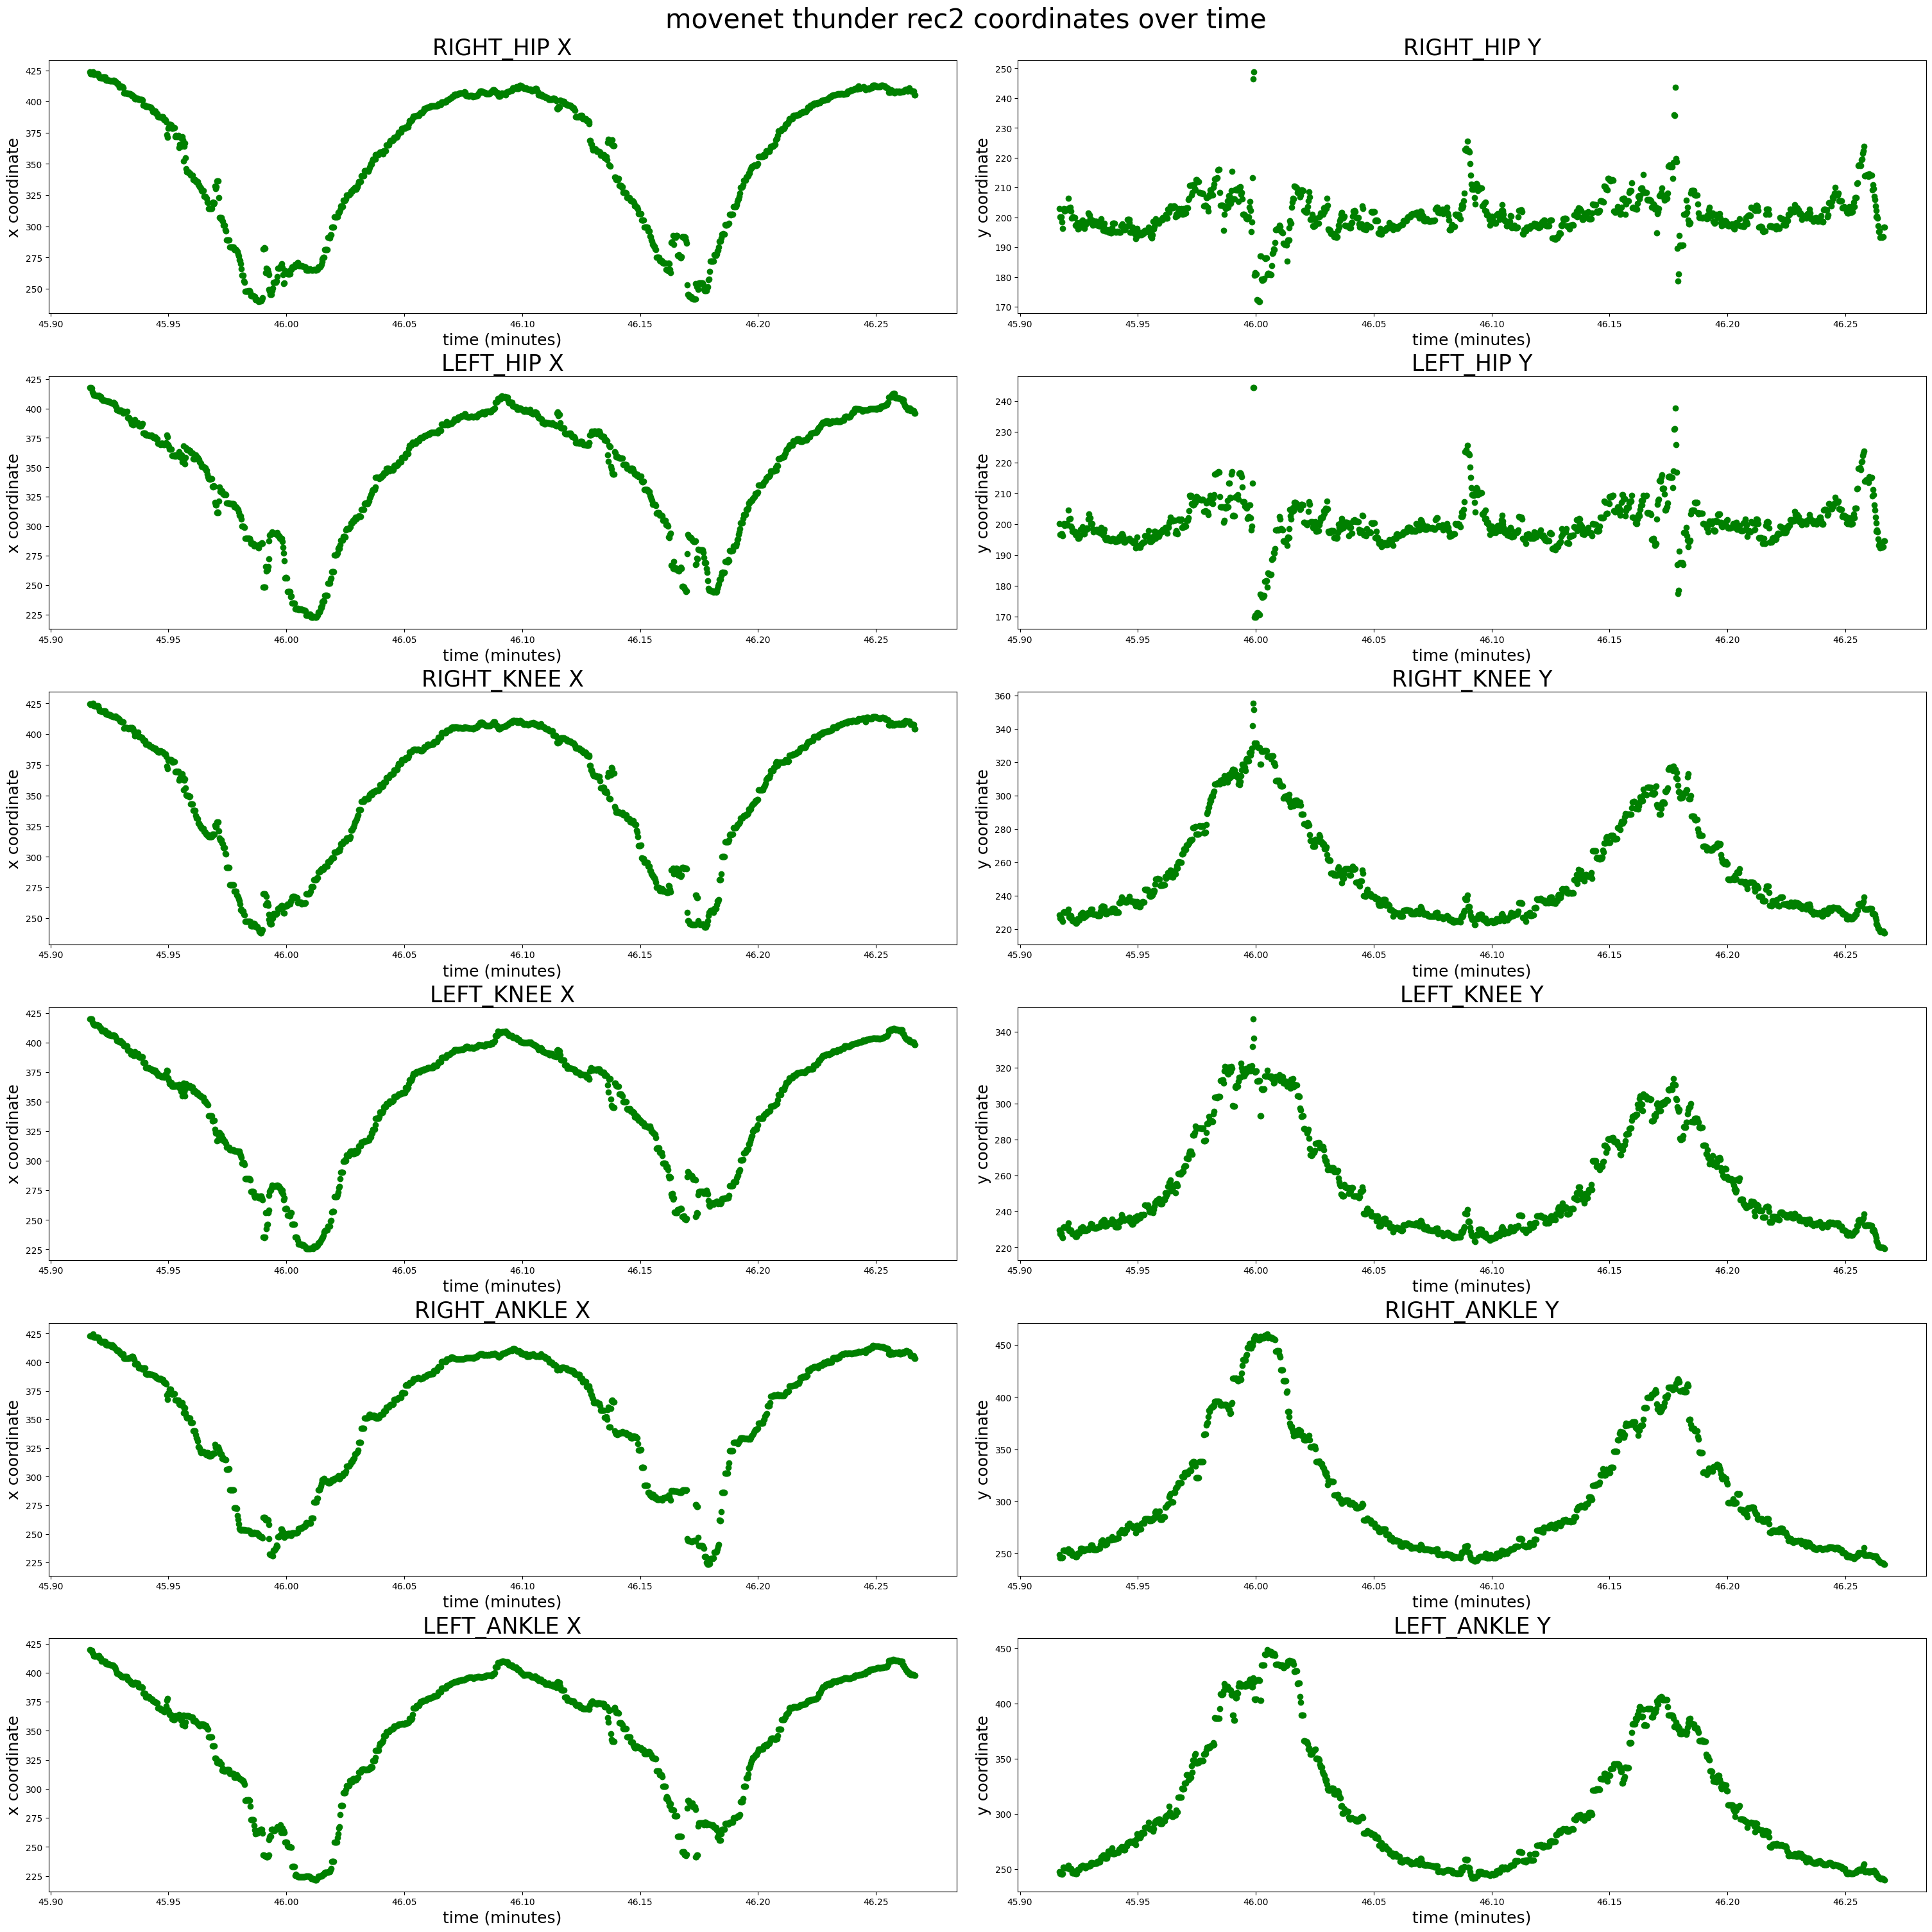

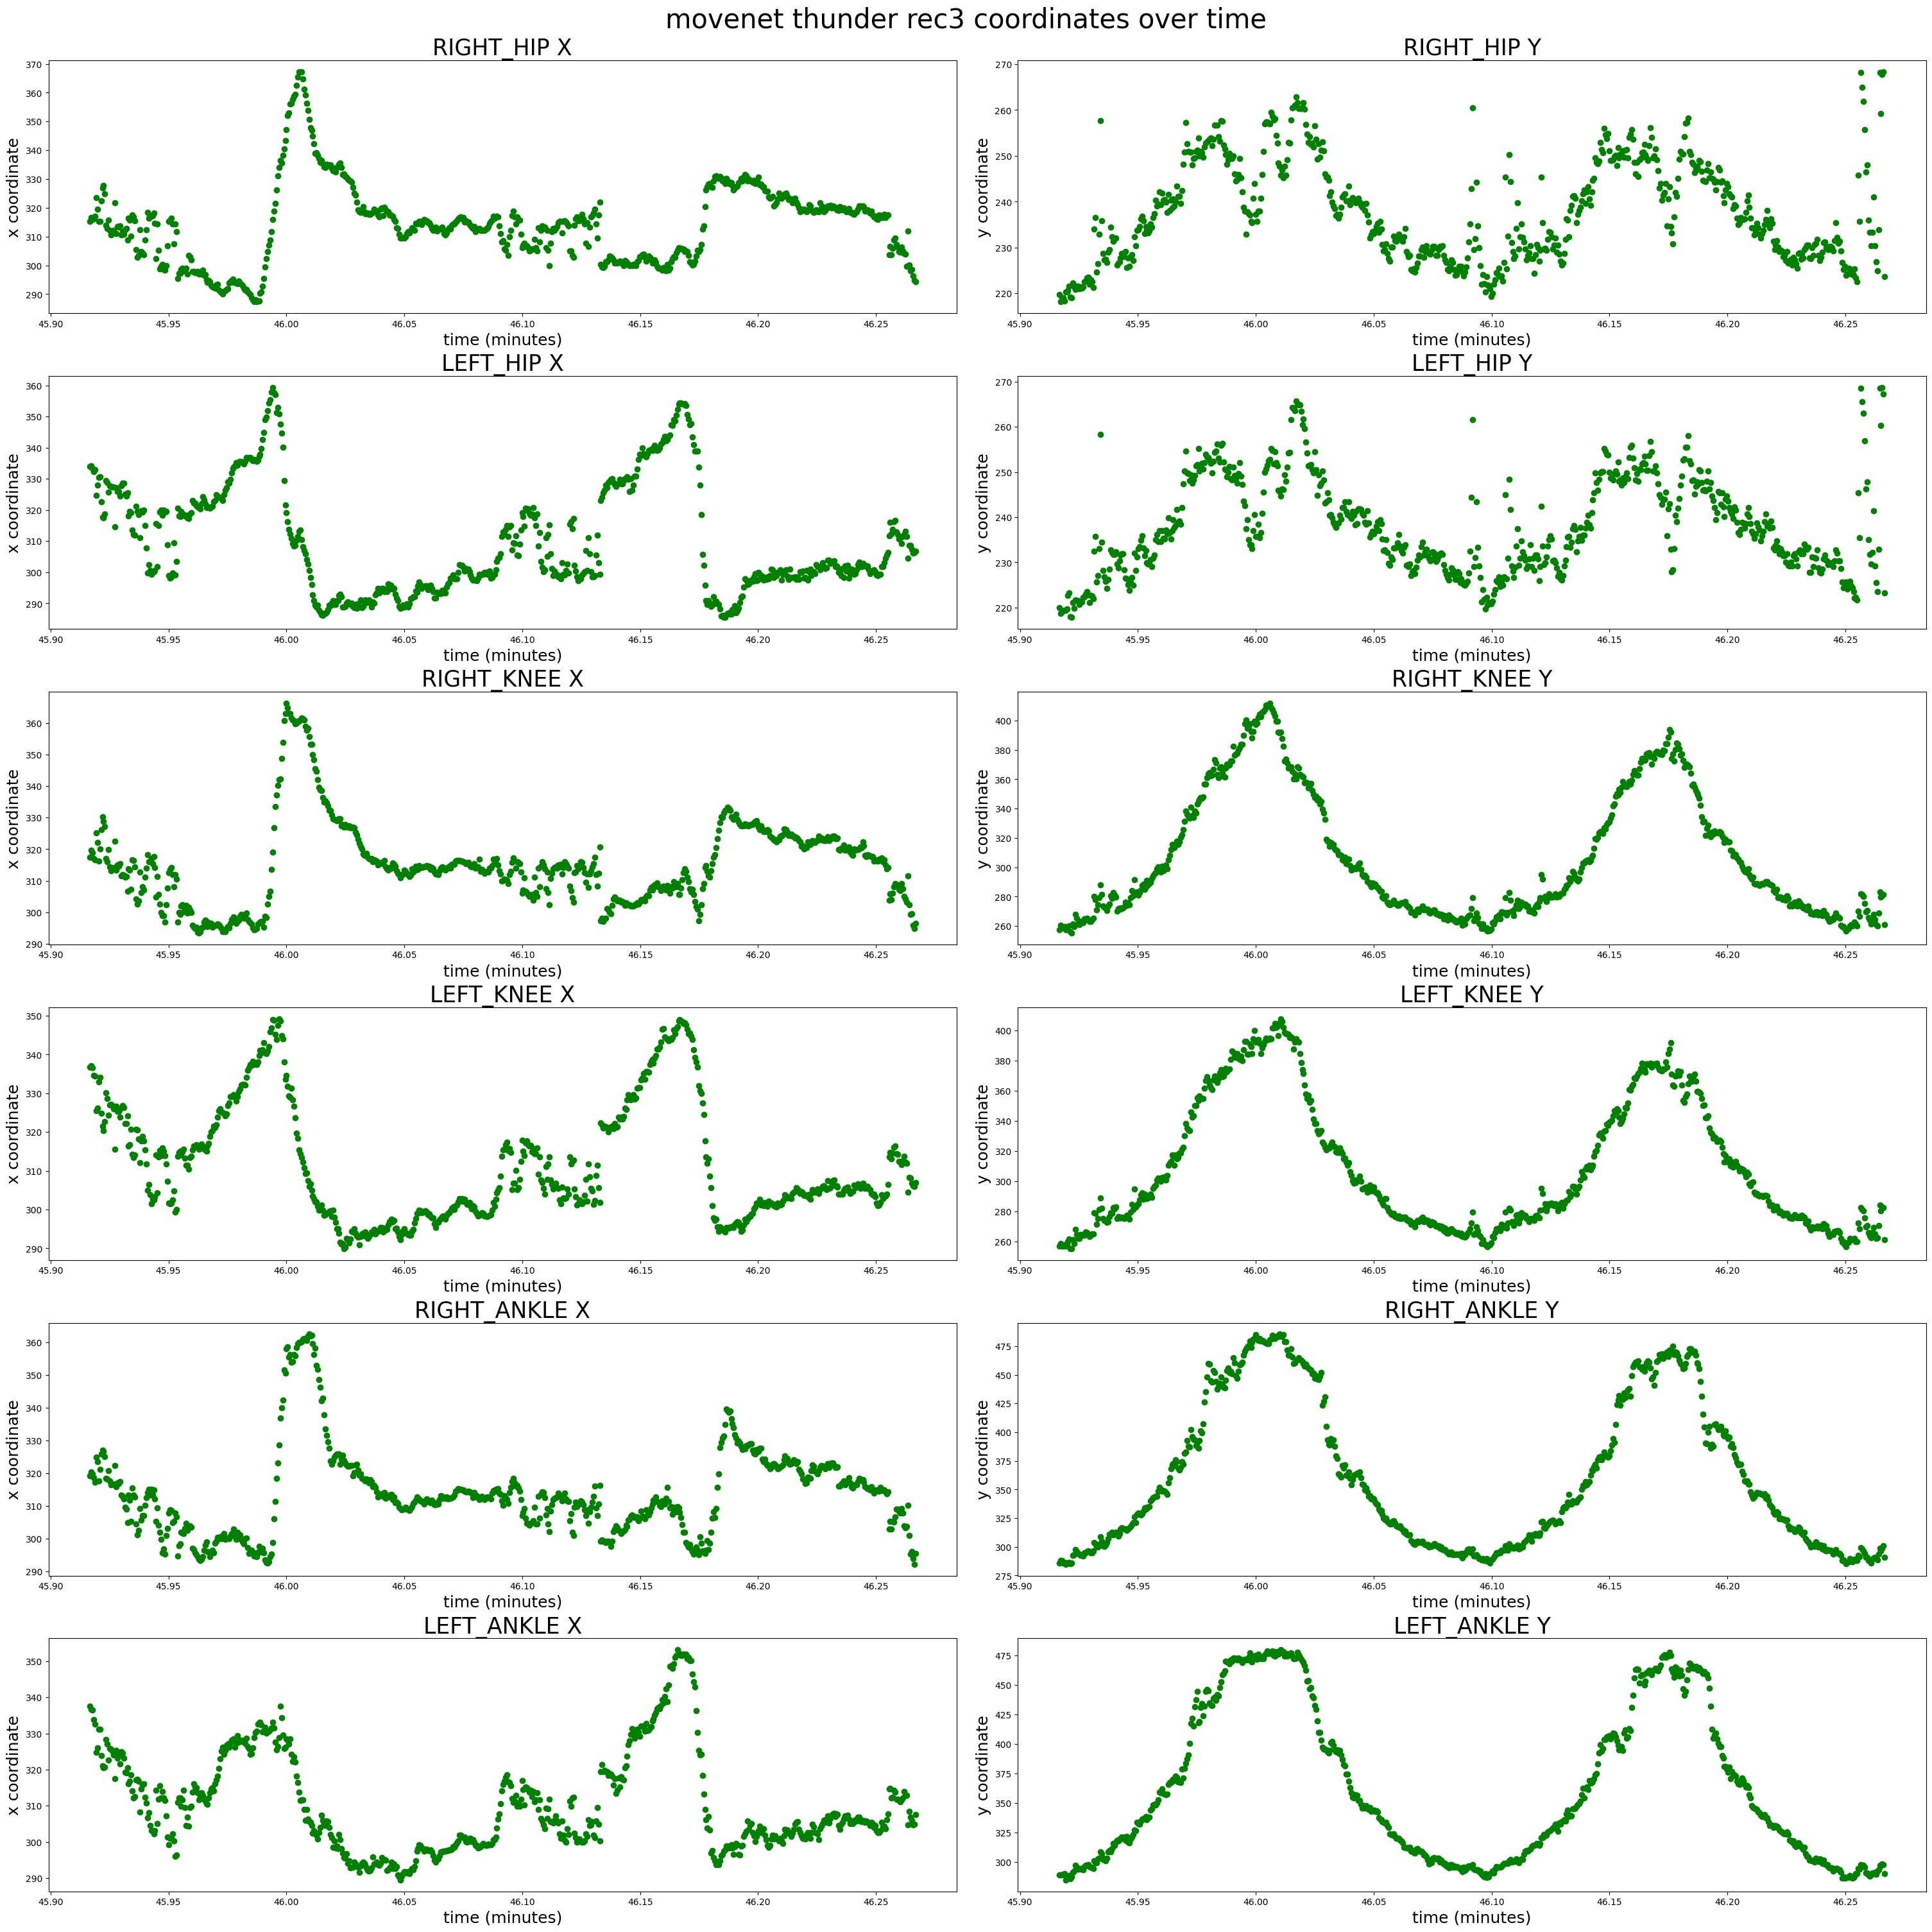

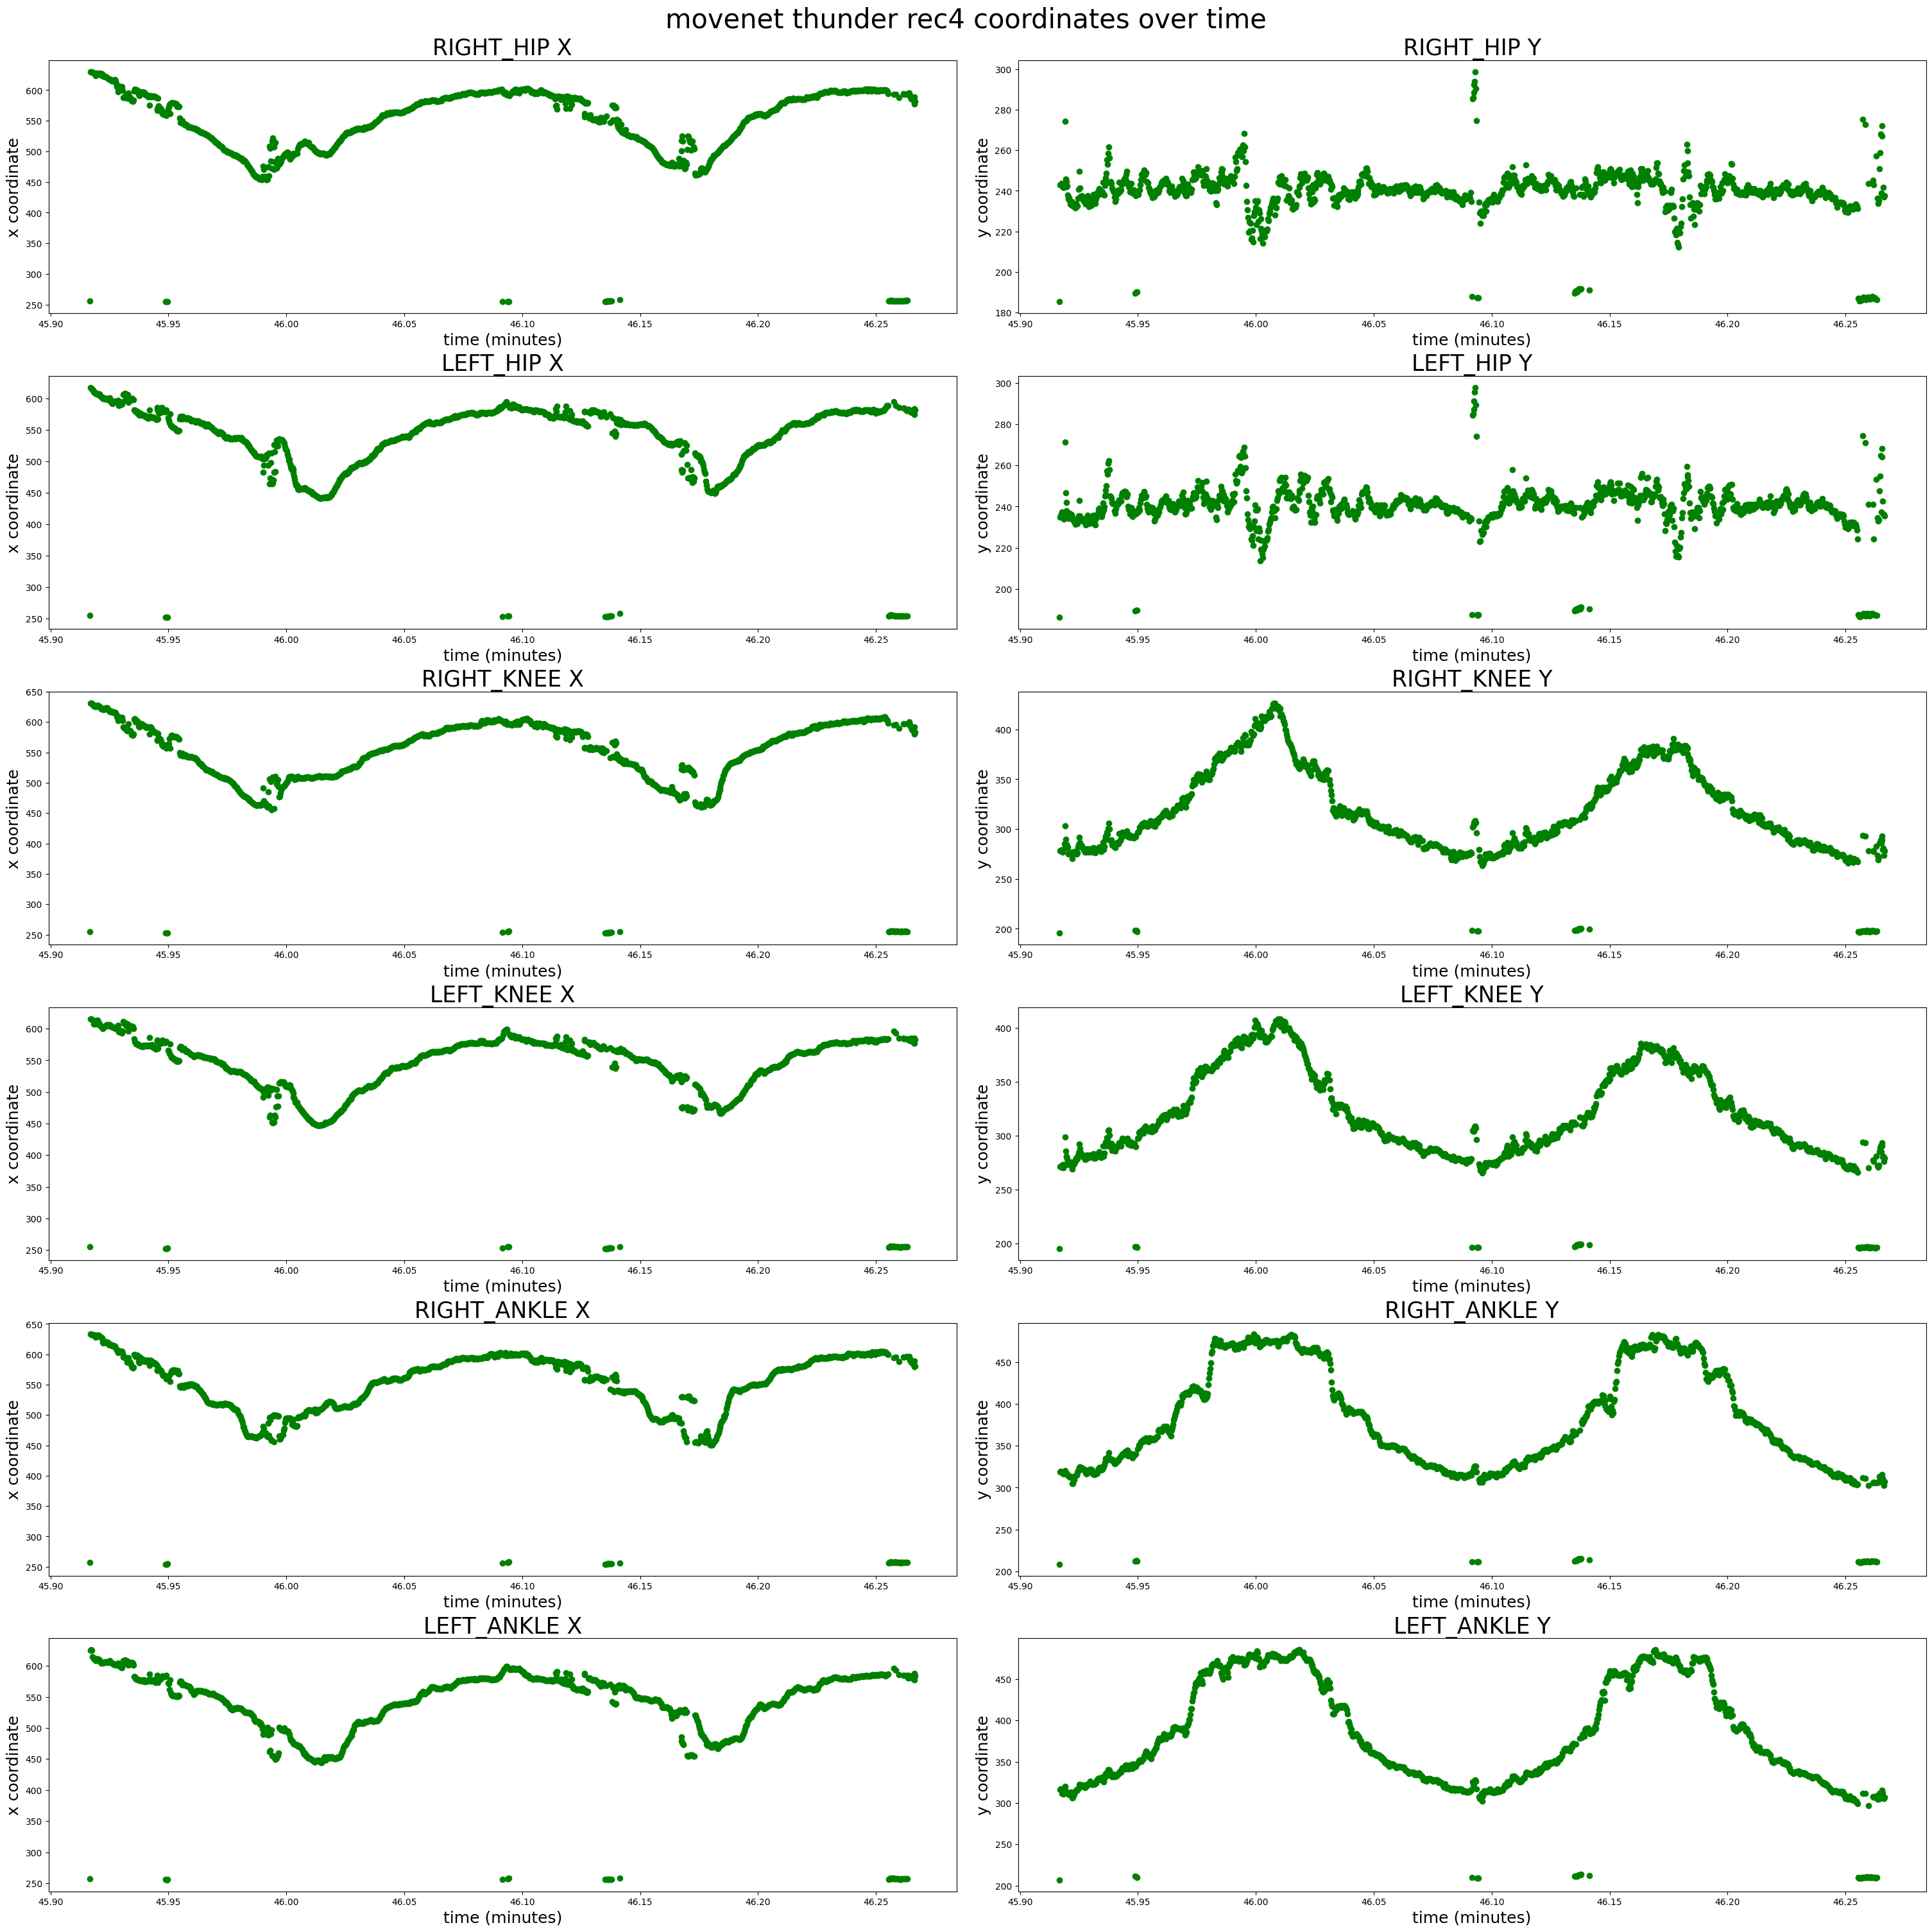

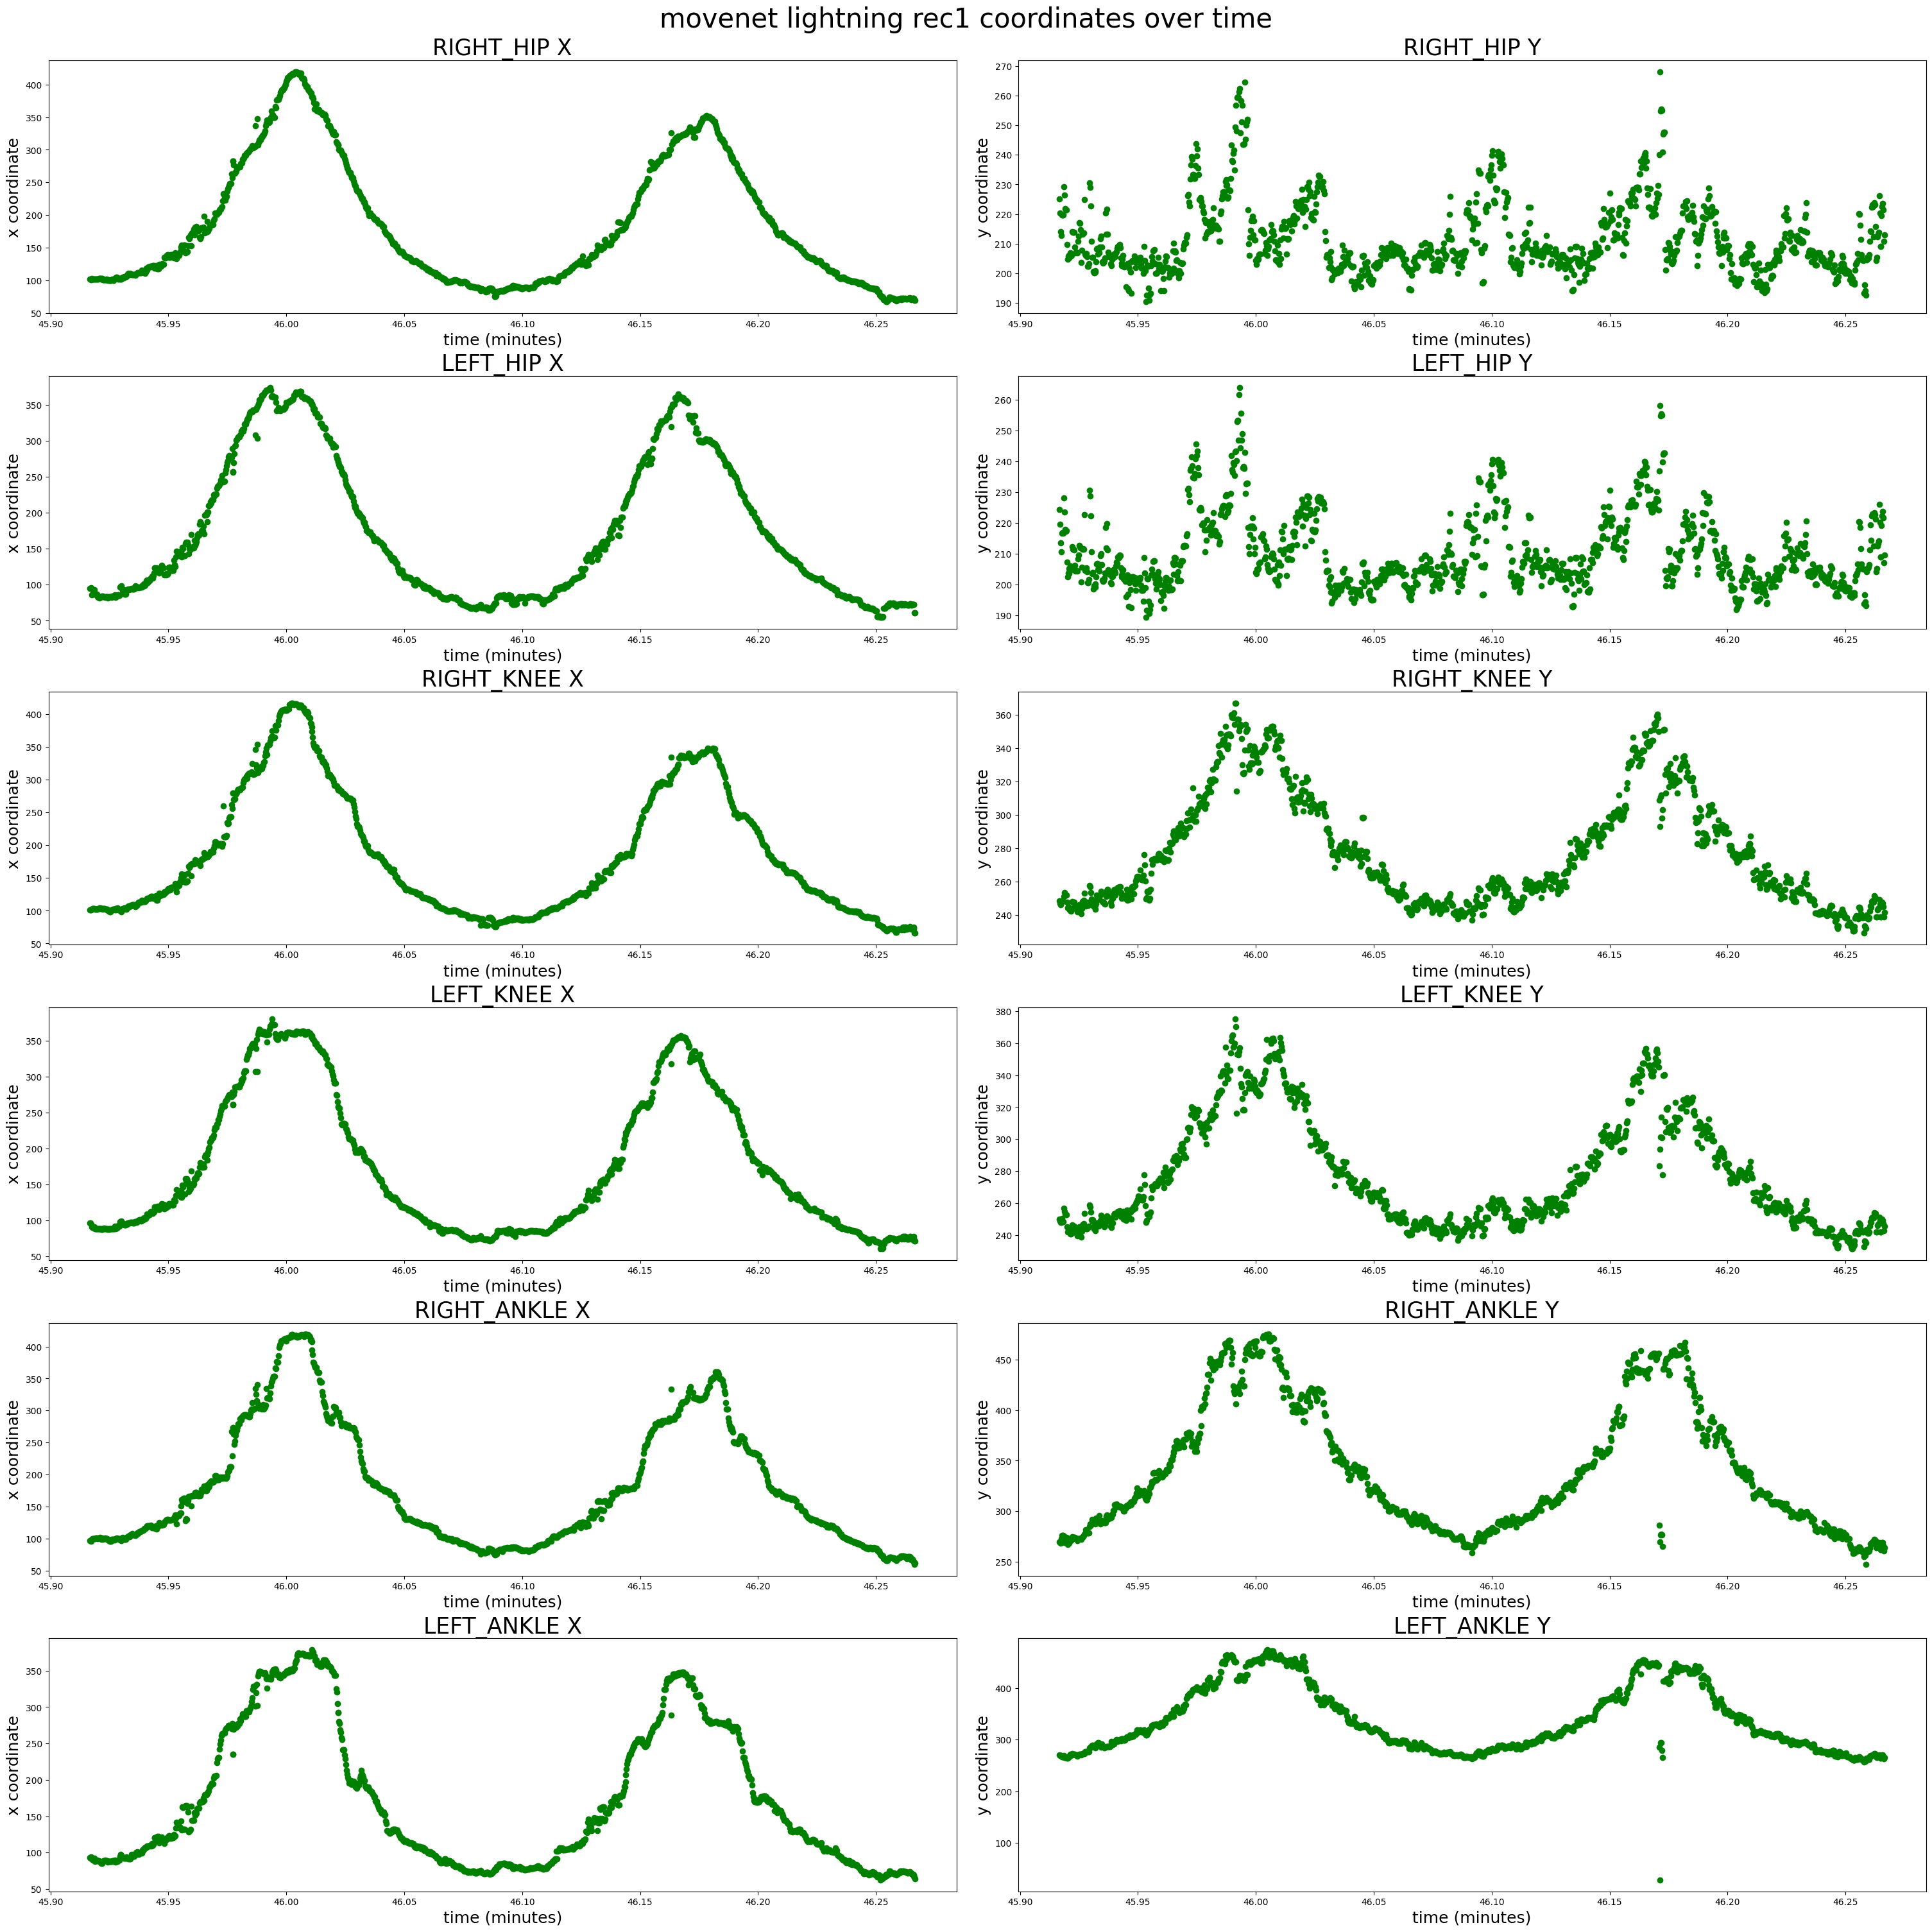

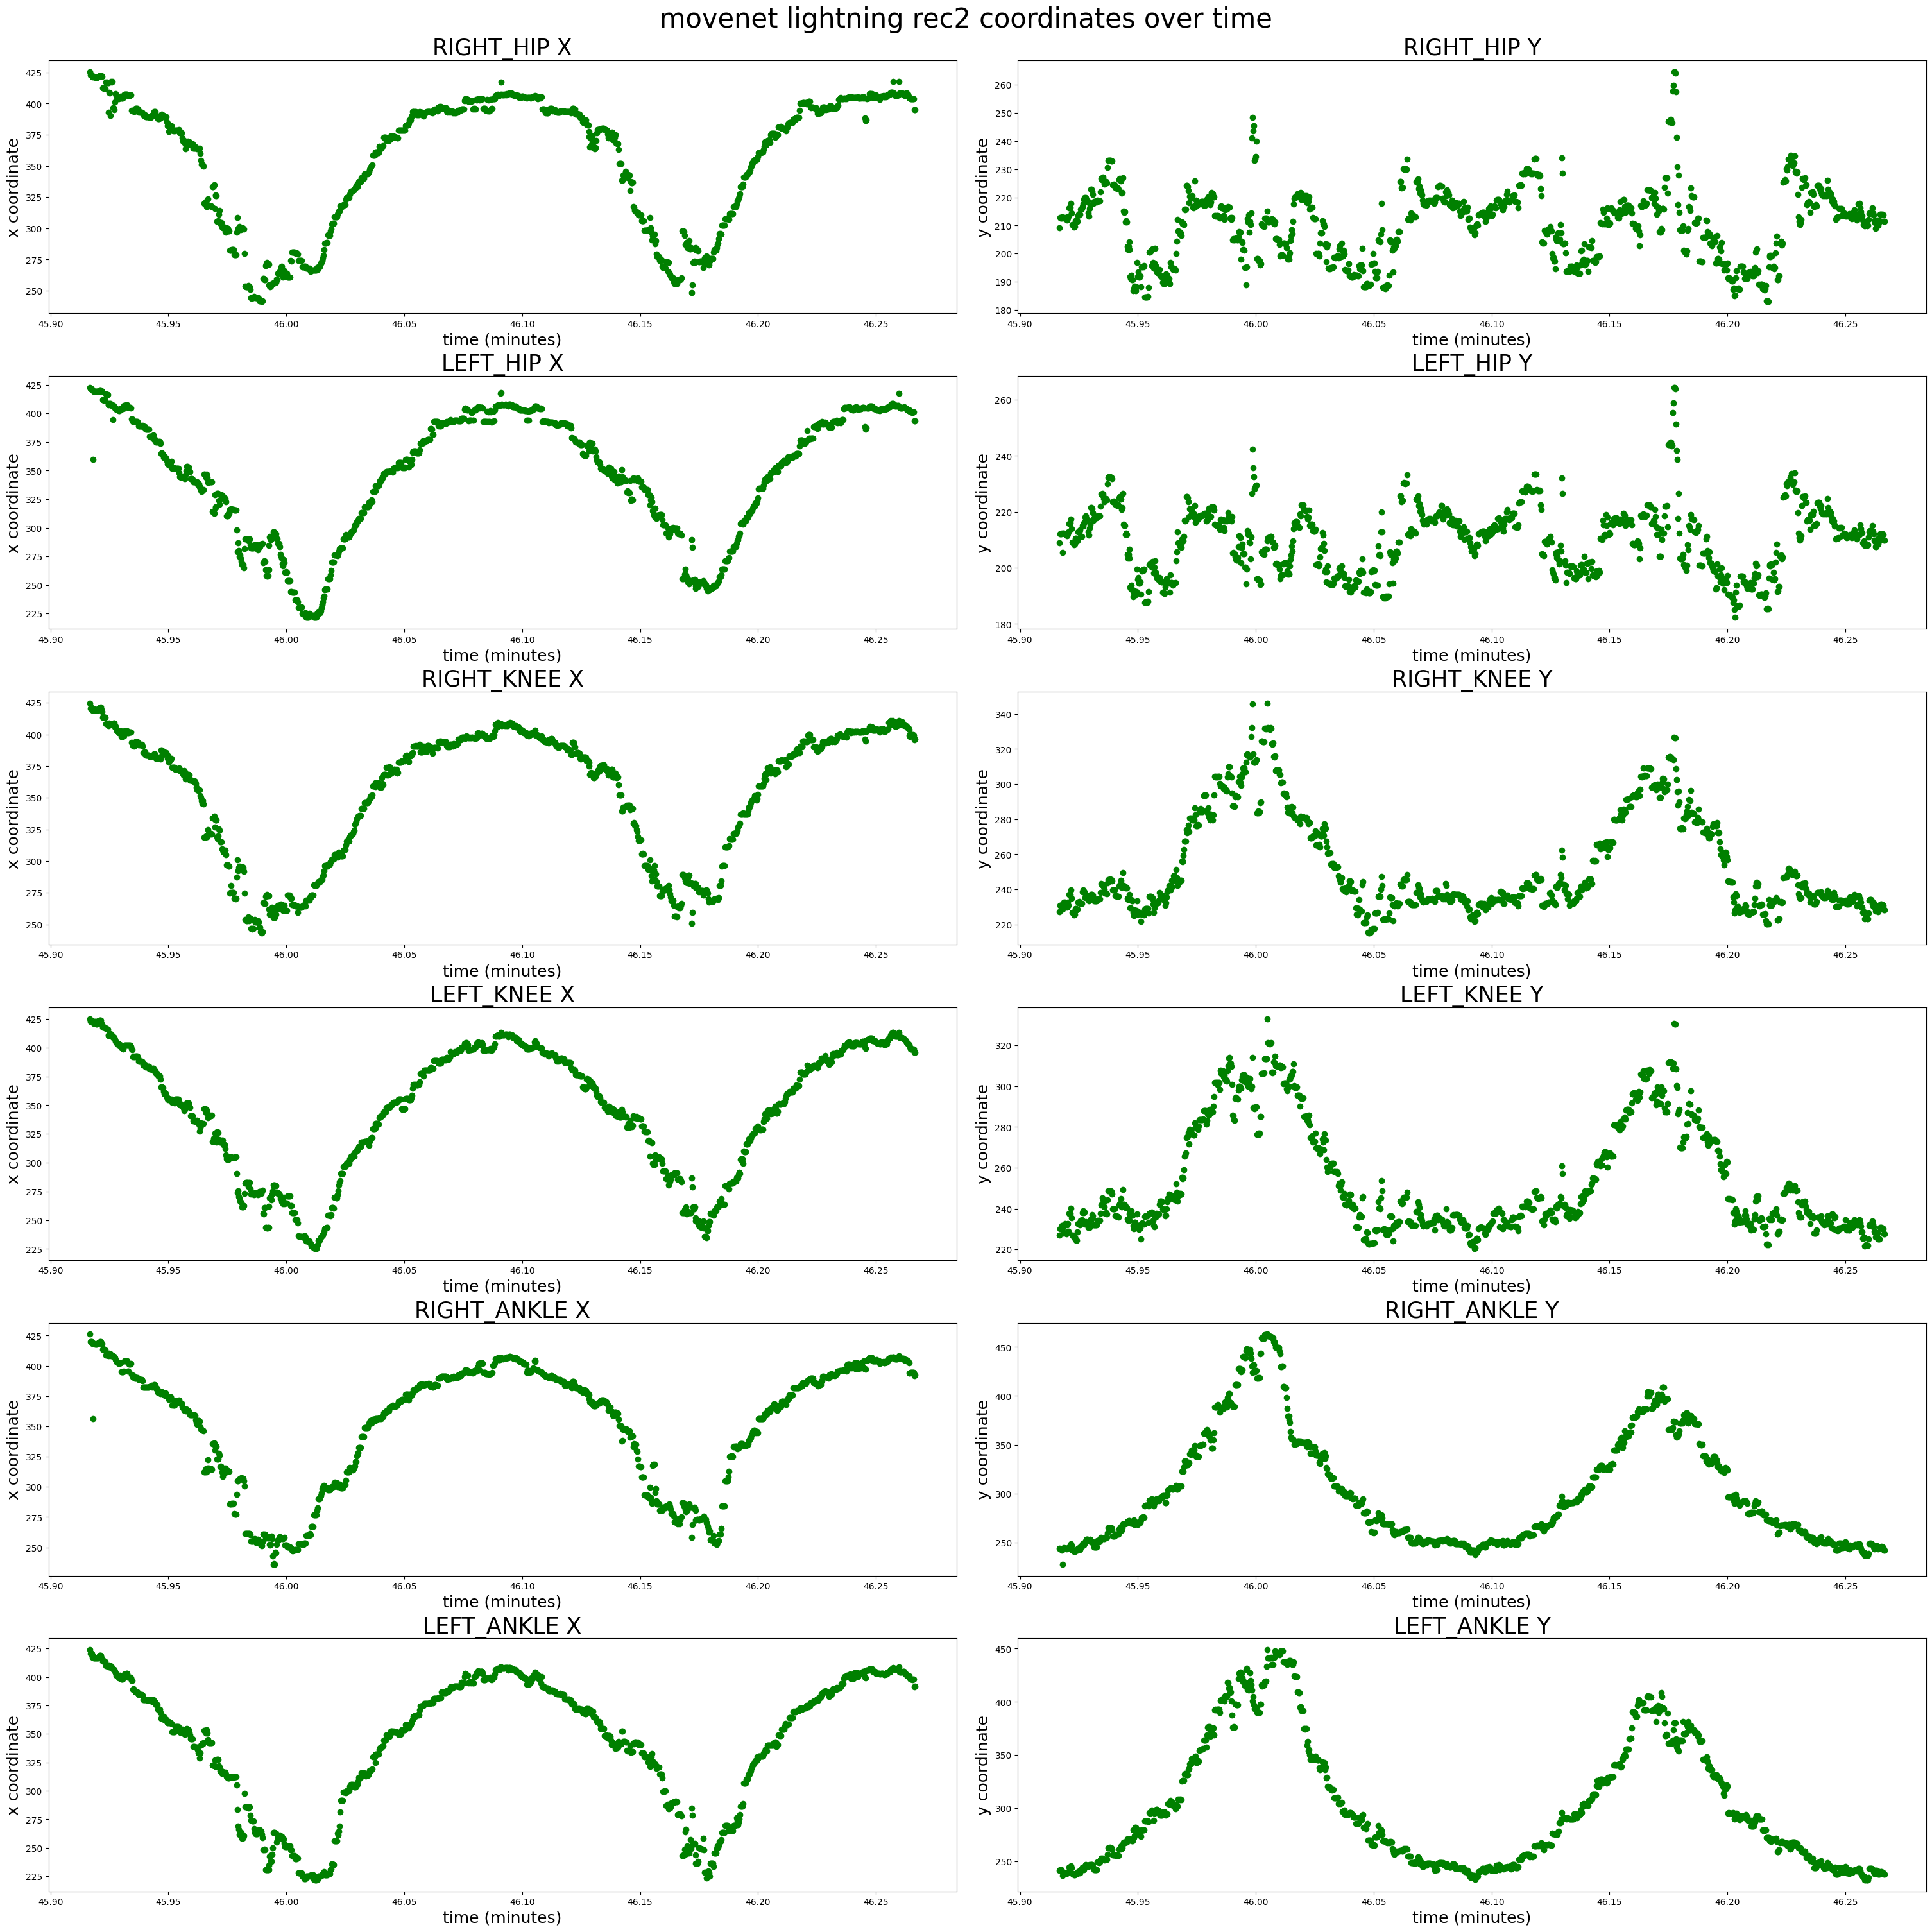

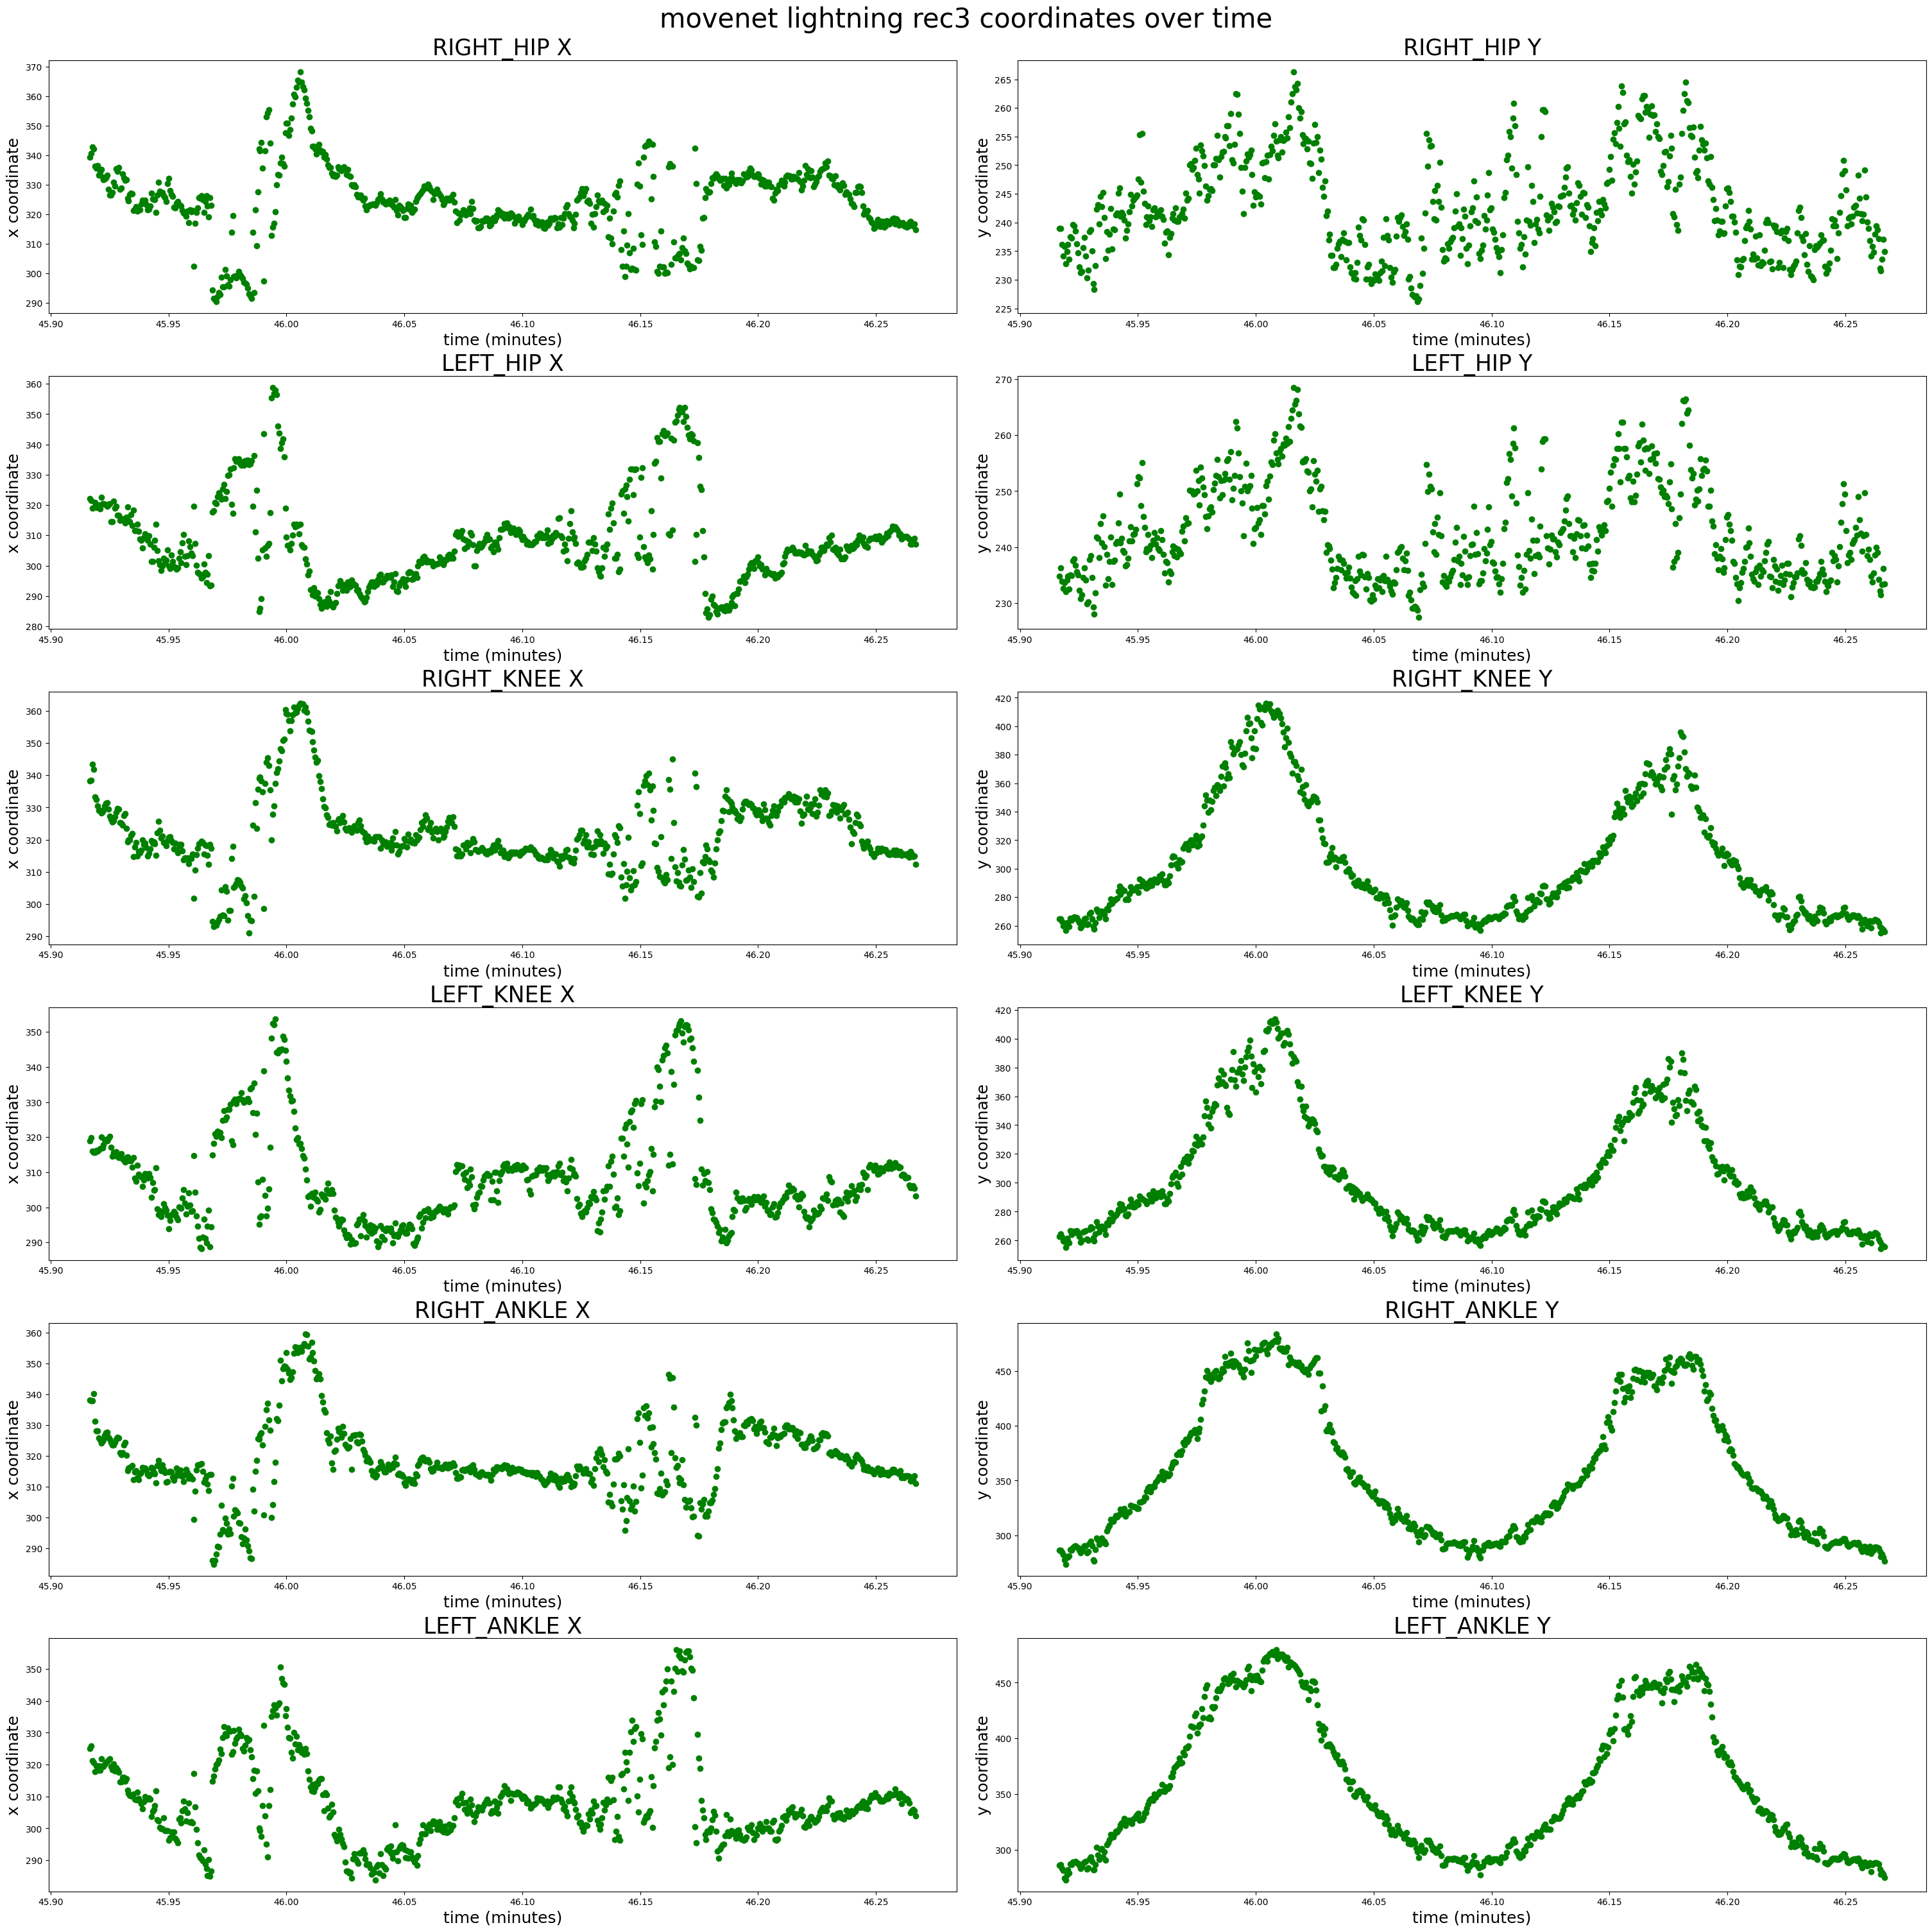

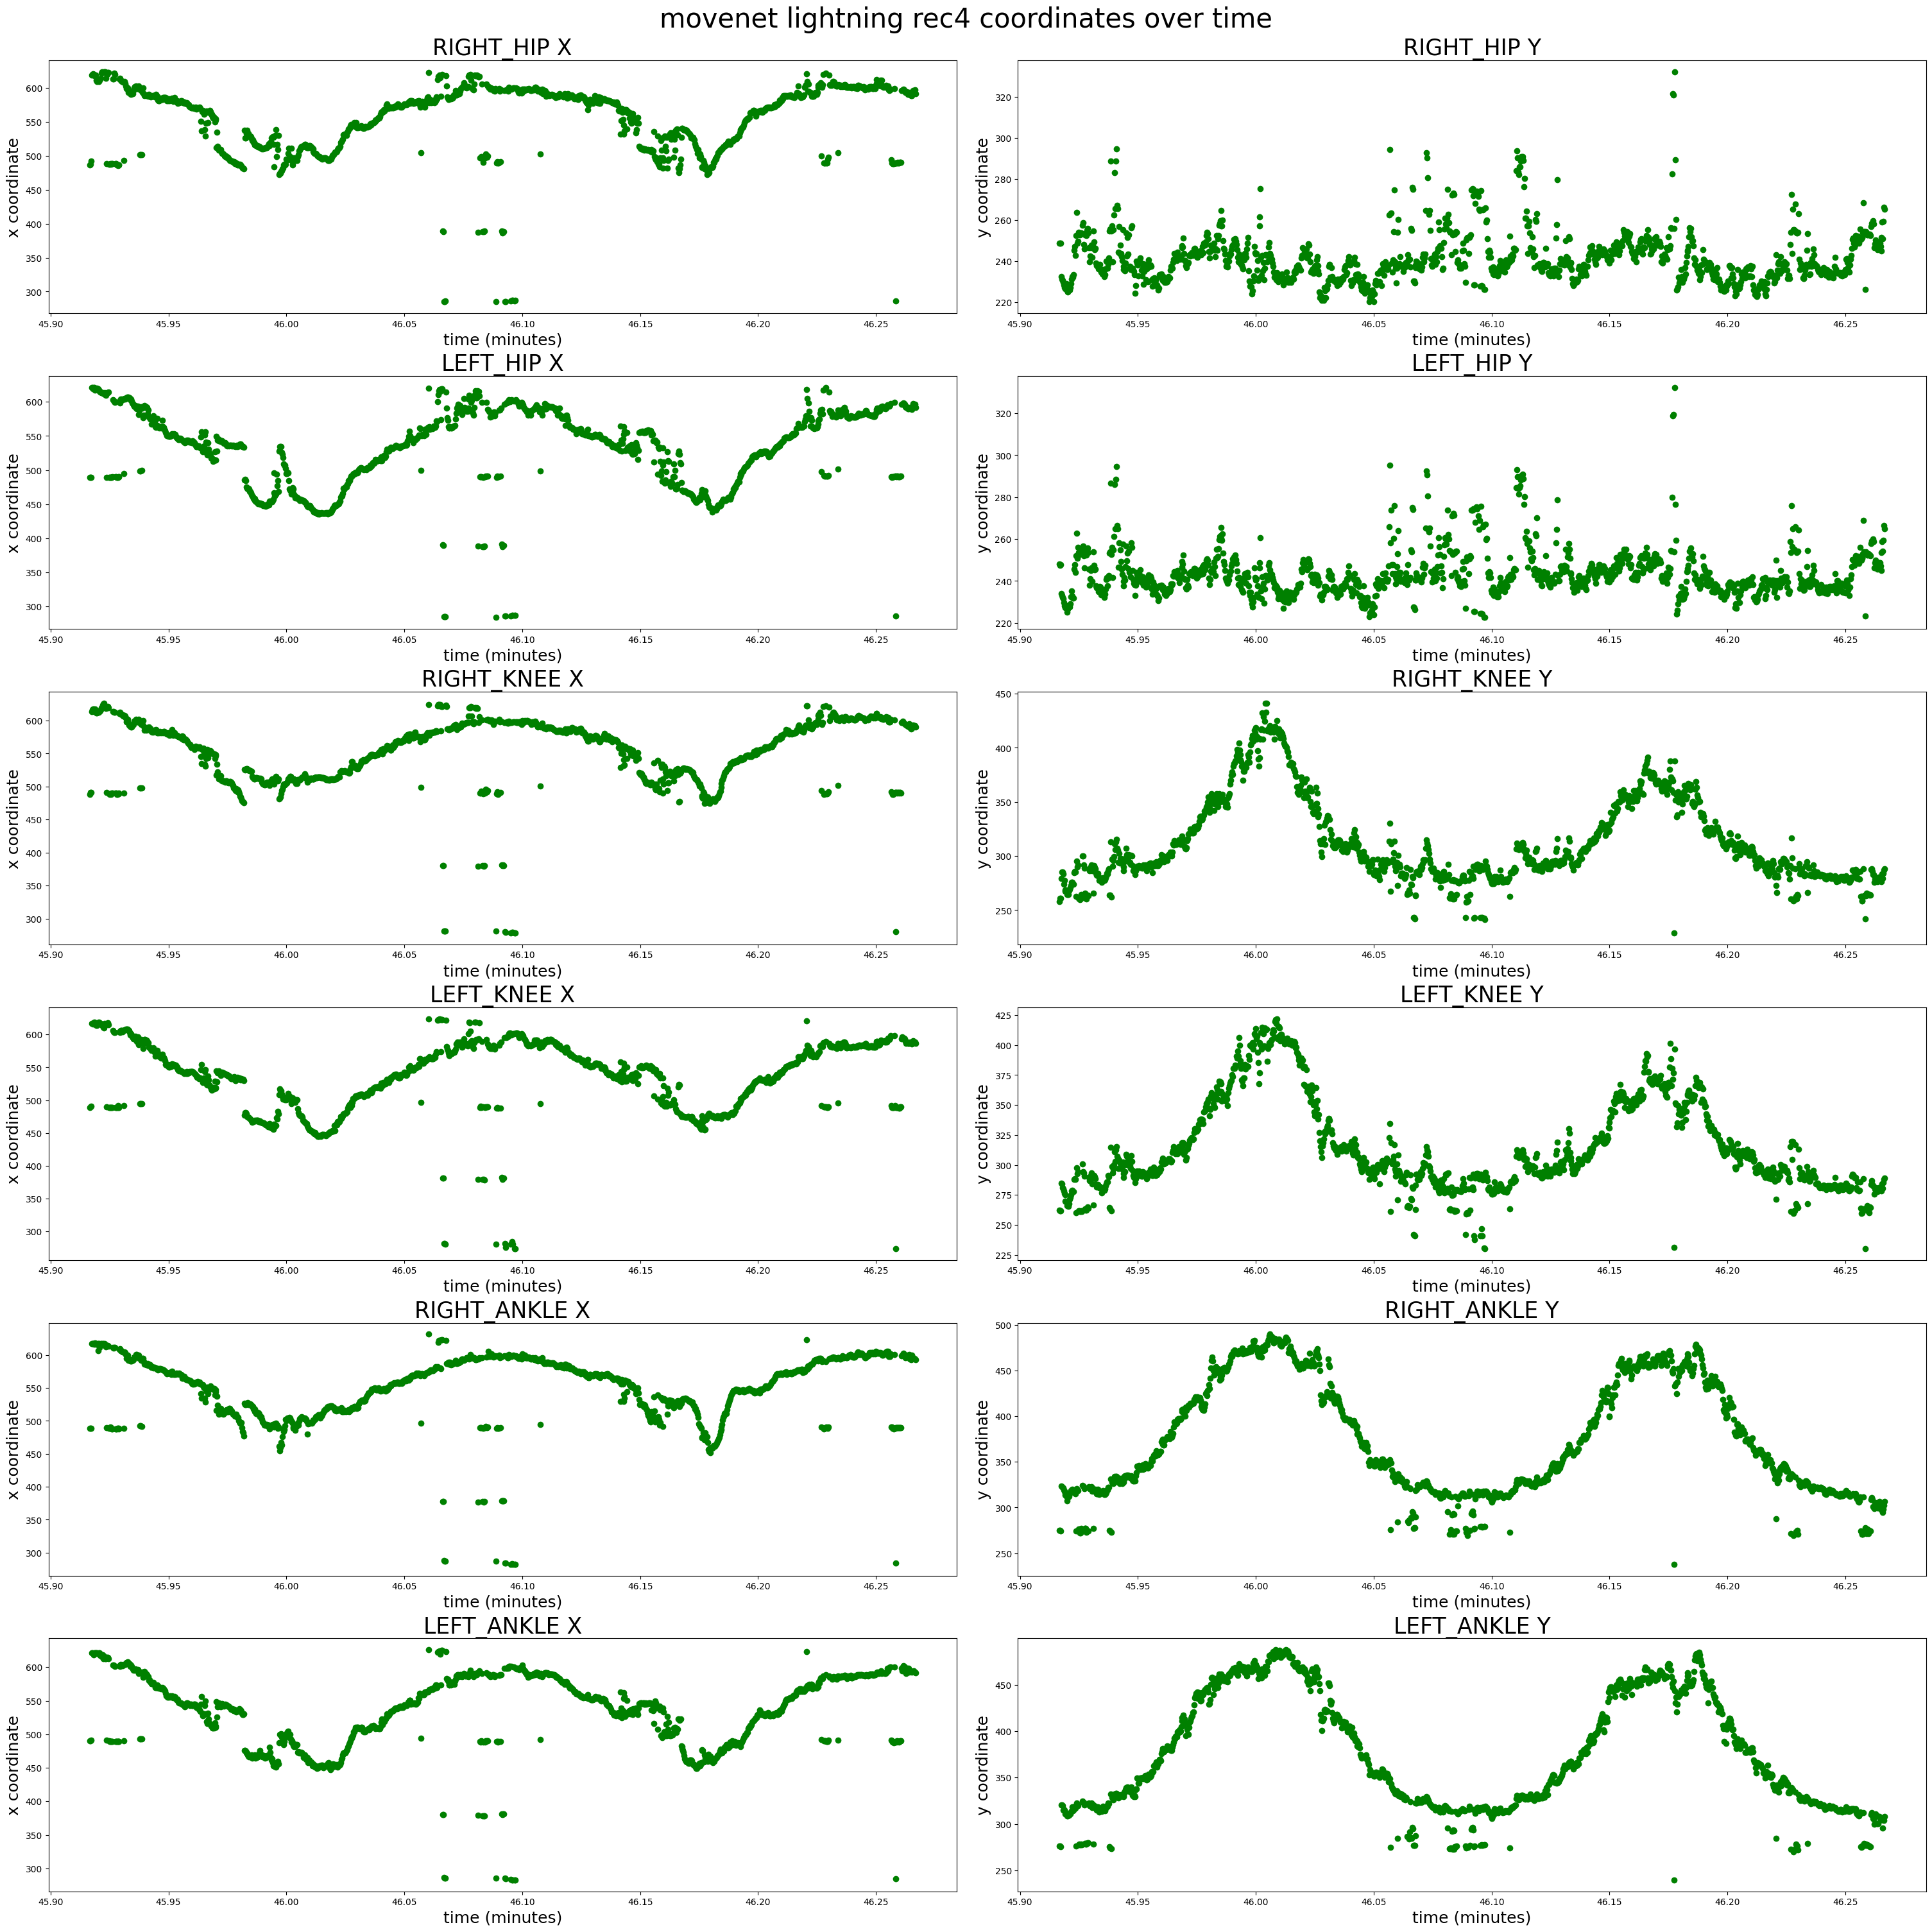

In [3]:
thunder_df1 = prep_df('keypoint_files/movenet/thunder/rec1_crop/movenet_rec1_crop_movenet_thunder_poses.csv')
thunder_df2 = prep_df('keypoint_files/movenet/thunder/rec2_crop/movenet_rec2_crop_movenet_thunder_poses.csv')
thunder_df3 = prep_df('keypoint_files/movenet/thunder/rec3_crop/movenet_rec3_crop_movenet_thunder_poses.csv')
thunder_df4 = prep_df('keypoint_files/movenet/thunder/rec4_crop/movenet_rec4_crop_movenet_thunder_poses.csv')

lightning_df1 = prep_df('keypoint_files/movenet/lightning/rec1_crop/movenet_rec1_crop_movenet_lightning_poses.csv')
lightning_df2 = prep_df('keypoint_files/movenet/lightning/rec2_crop/movenet_rec2_crop_movenet_lightning_poses.csv')
lightning_df3 = prep_df('keypoint_files/movenet/lightning/rec3_crop/movenet_rec3_crop_movenet_lightning_poses.csv')
lightning_df4 = prep_df('keypoint_files/movenet/lightning/rec4_crop/movenet_rec4_crop_movenet_lightning_poses.csv')

titles = ['movenet thunder rec1', 'movenet thunder rec2', 'movenet thunder rec3', 'movenet thunder rec4',
          'movenet lightning rec1', 'movenet lightning rec2', 'movenet lightning rec3', 'movenet lightning rec4']

df_list = [thunder_df1, thunder_df2, thunder_df3, thunder_df4, lightning_df1, lightning_df2, lightning_df3, lightning_df4]

pose_vars = ['RIGHT_HIP', 'LEFT_HIP', 'RIGHT_KNEE', 'LEFT_KNEE', 'RIGHT_ANKLE', 'LEFT_ANKLE']

for i in range(len(df_list)):
    plot_df(df_list[i], pose_vars, titles[i])
    plt.show()

Read in MCL Data

(following code is copied from the MCL_multiple_cameras_comparison notebook)

In [4]:
from utils import *

In [5]:
# MCL collected less keypoints, so plotting is slightly modified
mcl_keypoints = ['LEFT_ANKLE', 'LEFT_EAR', 'LEFT_SHOULDER', 'LEFT_HIP',
                'LEFT_KNEE', 'RIGHT_ANKLE', 'RIGHT_EAR', 'RIGHT_SHOULDER', 
                 'RIGHT_HIP', 'RIGHT_KNEE', 'COM']

kp_edges = ((1,6),(2,7),(2,3),(7,8),(3,8),(3,4),(8,9),(4,0),(9,5))

# time interval
time_int = [45 + (55.5/60), 46+(16.5/60)]

# origin of webcams in world coordinates
C1 = np.array([-.68, 2.66, 0.82])
C2 = np.array([-1.74, 3.43, 0.86])  
C3 = np.array([-2.66, 3.05, 0.84])  
C4 = np.array([-2.26, 3.26, 0.85])  

a1, a2, a3, a4 = 136, 180, 214, 200

# # read in MCL datasets
# # mcl_data = '../mcl experiments/mcl data/MCL_4_14/Global Points & CoM.txt'
# mcl_data = '../mcl_experiments/mcl_data/MCL_4_14/3d_MCL_points.csv'
# mcl_kp_df = pd.read_csv(mcl_data)
# mcl_kp_df = cleanup_mcl(mcl_kp_df)

Figuring out angles of rotation

In [6]:
import math

def angle_between_points(p1, p2):
  x1, y1 = p1
  x2, y2 = p2

  dx = x2 - x1
  dy = y2 - y1

  angle = math.atan2(dy, dx)
  angle = np.rad2deg(angle)

  return angle

print(a1, a2, a3, a4)
print(C1, C2, C3, C4)

C0 = np.array([0,0,0])
C0 = np.array([1,1,1])

print(angle_between_points(C0[:2], C1[:2]))
print(angle_between_points(C0[:2], C2[:2]))
print(angle_between_points(C0[:2], C3[:2]))
print(angle_between_points(C0[:2], C4[:2]))

a1_fix = angle_between_points(C0[:2], C1[:2])
a2_fix = angle_between_points(C0[:2], C2[:2])
a3_fix = angle_between_points(C0[:2], C3[:2])
a4_fix = angle_between_points(C0[:2], C4[:2])

136 180 214 200
[-0.68  2.66  0.82] [-1.74  3.43  0.86] [-2.66  3.05  0.84] [-2.26  3.26  0.85]
135.34308439952352
138.43142183685654
150.74640695967759
145.26830579801023


World2Cam transformation

(11, 3)
[[-0.96776404  0.25185861  0.          0.        ]
 [-0.25185861 -0.96776404  0.          0.        ]
 [ 0.          0.          1.          0.        ]]
(34,)
(3, 4)
all_coords1[0] shape  [-2.167448 -3.404195  0.093545]
(11, 3)
all_coords2[0] shape  [1.24020242 3.84034795 0.093545  ]


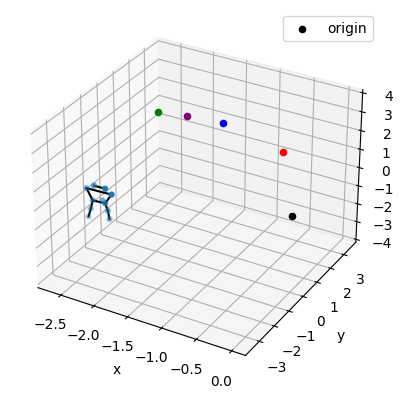

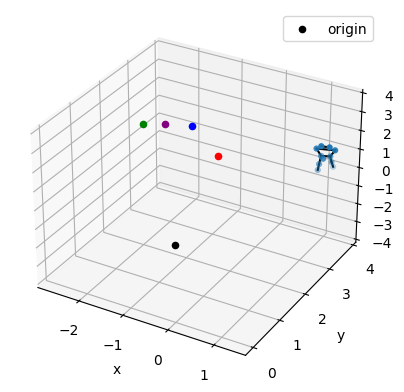

In [7]:
# original data 

mcl_data = '../mcl_experiments/mcl_data/MCL_4_14/3d_MCL_points.csv'
og_mcl = pd.read_csv(mcl_data)
og_mcl = cleanup_mcl(og_mcl, mcl_keypoints)
og_mcl = add_times(og_mcl, time_int)

def plot_pose(all_coords):
    x_coords, y_coords, z_coords = all_coords[:,0], all_coords[:,1], all_coords[:,2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x_coords, y_coords, z_coords, edgecolor='none')

    ax.scatter(C1[0], C1[1], C1[2], color='red')
    ax.scatter(C2[0], C2[1], C2[2], color='blue')
    ax.scatter(C3[0], C3[1], C3[2], color='green')
    ax.scatter(C4[0], C4[1], C4[2], color='purple')

    ax.scatter(0,0,0, color='black', label='origin')


    for i,j in kp_edges:
        xs, ys, zs = [x_coords[i], x_coords[j]], [y_coords[i], y_coords[j]], [z_coords[i], z_coords[j]]
        plt.plot(xs, ys, zs, color='black')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()

    # ax.view_init(elev=90, azim=-90)

    ax.set_zlim(-4,4)

pose1 = dict(og_mcl.iloc[1])

all_coords1 = np.array([pose1[kp] for kp in mcl_keypoints])

# RC = np.array([[1, 0, 0, -cam_origin[0]],
#                 [0, 1, 0, -cam_origin[1]],
#                 [0, 0, 1, -cam_origin[2]],])

angle = 0
cam_origin = np.array([0,0,0])
angle = a1_fix
c, s = np.cos(angle), np.sin(angle)
RC = np.array([[c, -s, 0, -cam_origin[0]],
                [s, c, 0, -cam_origin[1]],
                [0, 0, 1, -cam_origin[2]],])
print(all_coords1.shape)
print(RC)
print((np.append(all_coords1, 1)).shape)
print(RC.shape)
# all_coords_2 = all_coords1 @ RC

print("all_coords1[0] shape ", all_coords1[0])
all_coords2= np.array([RC@np.append(pose1[kp],1) for kp in mcl_keypoints])
print(all_coords2.shape)
print("all_coords2[0] shape ", all_coords2[0])



# c = np.cos(angle)
# s = np.sin(angle)
# # RC = np.array([[c, -s, 0, -cam_origin[0]],
# #                 [0, 0, 1, -cam_origin[1]],
# #                 [s, c, 0, -cam_origin[2]],])



# all_coords2 = np.array([P@np.append(pose1[kp],1) for kp in mcl_keypoints])
# print(RC[0])

plot_pose(all_coords1)
plt.show()
plot_pose(all_coords2)
plt.show()

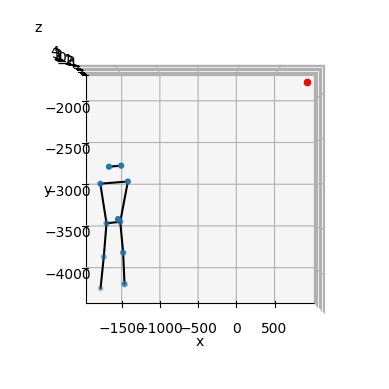

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

In [9]:
from mpl_toolkits.mplot3d import Axes3D


def world2cam(rot_angle, cam_origin, fx=967.186, fy=967.186, width=640, height=480):
    # world2cam transformation
    angle = np.radians(rot_angle) # make sure that this is in degrees
    c = np.cos(angle)
    s = np.sin(angle)
    # K = np.array([[fx, 0, 1],
    #               [0, fy, 1],
    #               [0, 0, 1],])
    K = np.array([[fx, 0, width/2],
                  [0, fy, height/2],
                  [0, 0, 1],])

    RC = np.array([[c, -s, 0, -cam_origin[0]],
                   [0, 0, 1, -cam_origin[1]],
                   [s, c, 0, -cam_origin[2]],])
    P = K @ RC
    return P

def mcl_plot_from_pose(kp_df, frame, rot_angle, cam_origin, plot_type='2D'):
    
    # P = world2cam(rot_angle, cam_origin)
    P = world2cam(rot_angle, cam_origin)

    pose = dict(kp_df.iloc[frame])
    all_coords = np.array([P@np.append(pose[kp],1) for kp in mcl_keypoints])
    # all_coords = np.array([world2cam(rot_angle, cam_origin, np.sqrt(pose[kp][0]**2+pose[kp][1]**2+pose[kp][2]**2))@np.append(pose[kp],1) for kp in mcl_keypoints])
    # all_coords = np.array([world2cam(rot_angle, cam_origin, fx=np.abs(pose[kp][0]), fy=np.abs(pose[kp][1]))@np.append(pose[kp],1) for kp in mcl_keypoints])
    # all_coords = np.array([world2cam(rot_angle, cam_origin, fx=640, fy=480)@np.append(pose[kp],1) for kp in mcl_keypoints])

    x_coords, y_coords, z_coords = all_coords[:,0], all_coords[:,1], all_coords[:,2]
    shifted_cam_origin = P @ np.append(cam_origin,1)

    s_c2 = P @ np.append(C2,1)
    s_c3 = P @ np.append(C3,1)
    s_c4 = P @ np.append(C4,1)
    
    if plot_type == '2D':
        fig = plt.figure()
        ax = fig.add_subplot()

        ax.scatter(x=x_coords, y=y_coords, edgecolor='none')
        ax.scatter(shifted_cam_origin[0], shifted_cam_origin[1], color='red')

        for i,j in kp_edges:
            plt.plot([x_coords[i], x_coords[j]], [y_coords[i], y_coords[j]], color='black')

        ax.set_xlabel("x")
        ax.set_ylabel("y") 
        # ax.set_xlim(-1000,1000)
        # ax.set_ylim(1500,2500)
    
    if plot_type == '3D':

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        ax.scatter(x_coords, y_coords, z_coords, edgecolor='none')

        ax.scatter(shifted_cam_origin[0], shifted_cam_origin[1], shifted_cam_origin[2], color='red')
        # ax.scatter(s_c2[0], s_c2[1], s_c2[2], color='black')
        # ax.scatter(s_c3[0], s_c3[1], s_c3[2], color='black')
        # ax.scatter(s_c4[0], s_c4[1], s_c4[2], color='black')

        for i,j in kp_edges:
            xs, ys, zs = [x_coords[i], x_coords[j]], [y_coords[i], y_coords[j]], [z_coords[i], z_coords[j]]
            plt.plot(xs, ys, zs, color='black')

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")

        ax.view_init(elev=90, azim=-90)

        ax.set_zlim(-4,4)

    plt.show()
    return ax

mcl_data = '../mcl_experiments/mcl_data/MCL_4_14/3d_MCL_points.csv'
og_mcl = pd.read_csv(mcl_data)
og_mcl = cleanup_mcl(og_mcl, mcl_keypoints)
og_mcl = add_times(og_mcl, time_int)

mcl_plot_from_pose(og_mcl, 1, 0, C2, plot_type='3D')
# mcl_plot_from_pose(og_mcl, 1000, 180, C2, plot_type='3D')
# mcl_plot_from_pose(og_mcl, 2000, 180, C2, plot_type='3D')

# mcl_plot_from_pose(og_mcl, 1, 180, C2, plot_type='2D')
# mcl_plot_from_pose(og_mcl, 1000, 180, C2, plot_type='2D')
# mcl_plot_from_pose(og_mcl, 1100, 180, C2, plot_type='2D')
# mcl_plot_from_pose(og_mcl, 1200, 180, C2, plot_type='2D')

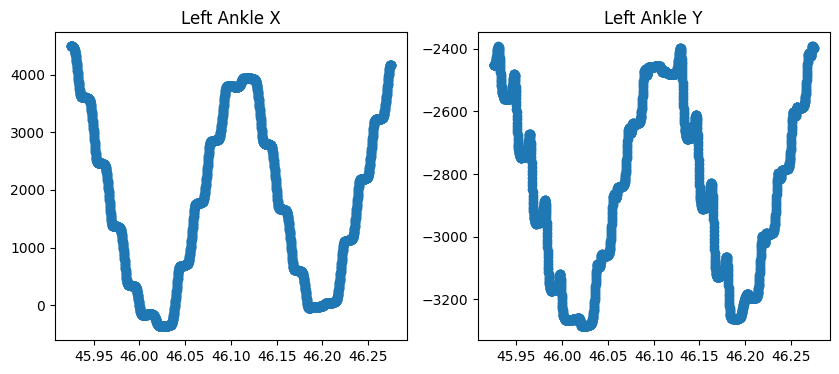

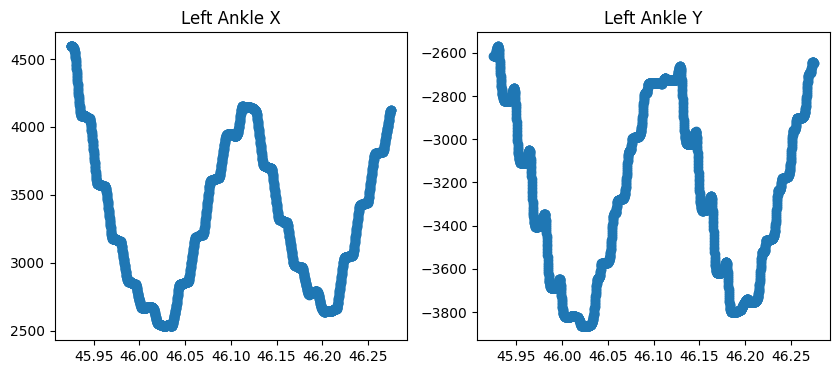

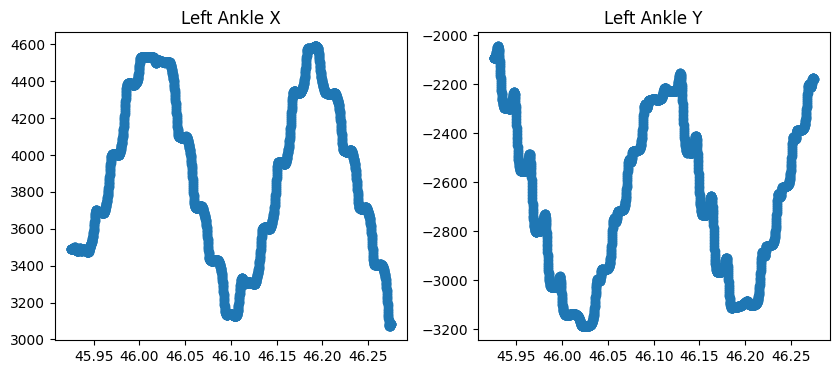

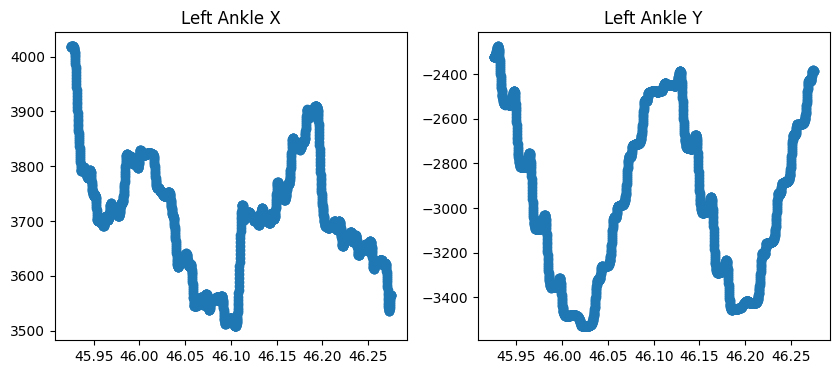

In [10]:
def plot_angle_test(df, angle, coord, P):
    P = world2cam(angle, coord)
    for keypoint in mcl_keypoints:
        df[keypoint] = df[keypoint].apply(lambda x: P@np.append(x,1))
    
    df = add_xyz(df)

    fig, ax = plt.subplots(1,2, figsize=(10,4))
    
    ax[0].scatter(df['time'], df['LEFT_ANKLE_X'])
    ax[0].set_title('Left Ankle X')
    # plt.show()
    ax[1].scatter(df['time'], df['LEFT_ANKLE_Y'])
    ax[1].set_title('Left Ankle Y')
    plt.show()

P = world2cam(a3, C3)
test_mcl = og_mcl.copy()

plot_angle_test(og_mcl.copy(), a1, C1, P)
plot_angle_test(og_mcl.copy(), a2, C2, P)
plot_angle_test(og_mcl.copy(), a3, C3, P)
plot_angle_test(og_mcl.copy(), a4, C4, P)

In [ ]:

# test_df = mcl_kp_df.copy()
# time_int = [45 + (55.5/60), 46+(16.5/60)]
# test_df = add_times(test_df, time_int)

# mcl_1, mcl_2, mcl_3, mcl_4 = test_df.copy(), test_df.copy(), test_df.copy(), test_df.copy()

# # origin of camera in world coordinates
# C1 = np.array([-.68, 2.66, 0.82])
# C2 = np.array([-1.74, 3.43, 0.86])  
# C3 = np.array([-2.66, 3.05, 0.84])  
# C4 = np.array([-2.26, 3.26, 0.85])  

# a1, a2, a3, a4 = 136, 180, 214, 200

# mcl_1 = transform_df(mcl_1, C1, a1)
# mcl_2 = transform_df(mcl_2, C2, a2)
# mcl_3 = transform_df(mcl_3, C3, a3)
# mcl_4 = transform_df(mcl_4, C4, a4)

# og_mcl = mcl_kp_df.copy()
# og_mcl = add_times(og_mcl, time_int)
# og_mcl = add_xyz(og_mcl)

# # temporary: 
# plot_vars = ['RIGHT_HIP', 'LEFT_HIP']

# # df1, df2, df3 = mcl_1.copy(), thunder_df1.copy(), lightning_df1.copy()
# # df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# # models_compare(df1, df2, df3, plot_vars, plot_title='CAM1 Models Comparison')

# df1, df2, df3 = mcl_2.copy(), thunder_df2.copy(), lightning_df2.copy()
# df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# models_compare(df1, df2, df3, plot_vars, plot_title='CAM2 Models Comparison')

# # df1, df2, df3 = mcl_3.copy(), thunder_df3.copy(), lightning_df3.copy()
# # df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# # models_compare(df1, df2, df3, plot_vars, plot_title='CAM3 Models Comparison')

# # df1, df2, df3 = mcl_4.copy(), thunder_df4.copy(), lightning_df4.copy()
# # df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# # models_compare(df1, df2, df3, plot_vars, plot_title='CAM4 Models Comparison')



In [ ]:
# plt.scatter(mcl_1['time'], mcl_1['RIGHT_HIP_X'])

In [ ]:
# titles = ['MCL OG', 'MCL rec1', 'MCL rec2', 'MCL rec3', 'MCL rec4']
# df_list = [og_mcl, mcl_1, mcl_2, mcl_3, mcl_4]
# pose_vars = ['RIGHT_HIP', 'LEFT_HIP', 'RIGHT_KNEE', 'LEFT_KNEE', 'RIGHT_ANKLE', 'LEFT_ANKLE']
# # plot_df(test_df, pose_vars, 'test rotation', plot_color='tab:blue')
# for i in range(len(df_list)):
#     plot_df(df_list[i], pose_vars, titles[i], plot_color='tab:blue')
#     plt.show()

In [ ]:
# # pose_vars = ['RIGHT_HIP', 'LEFT_HIP', 'RIGHT_KNEE', 'LEFT_KNEE', 'RIGHT_ANKLE', 'LEFT_ANKLE']
# pose_vars = ['RIGHT_HIP', 'LEFT_HIP']
# model_title = 'movenet thunder rec1'

# clean_df = kp_df.copy()

# # Calculate the difference between the values in the column
# diff = clean_df['LEFT_KNEE_Y'].diff()
# # Filter the rows that have the same value as the previous row
# clean_df = clean_df[(diff < .1)&(diff > -.1)]
# clean_df = clean_df[clean_df['RIGHT_HIP_Y']>100]

# plot_df(kp_df, pose_vars, model_title, fig_size=(20,15))
# plt.ylim(0,480)
# plt.show()

# plot_df(clean_df, pose_vars, model_title, fig_size=(20,15))
# plt.ylim(0,480)
# plt.show()


## Compare MCL with MoveNets

Compare MCL with another dataframe

In [ ]:
# plot_var = 'LEFT_ANKLE'

# df1 = mcl_1.copy()
# df2 = thunder_df1.copy()
# df3 = lightning_df1.copy()

# # time correction
# time_int = [45 + (55.0/60), 46+(14.9/60)]
# df1 = add_times(df1, time_int)

# # manually remove the outliers
# df2 = df2[df2['RIGHT_HIP_Y']>100]
# df3 = df3[df3['RIGHT_HIP_Y']>100]

# df1 = normalize_df(df1, f'{plot_var}_X', f'{plot_var}_Y')
# df2 = normalize_df(df2, f'{plot_var}_X', f'{plot_var}_Y')
# df3 = normalize_df(df3, f'{plot_var}_X', f'{plot_var}_Y')

# plt.scatter(df1['time'], df1[f'{plot_var}_X'], color='black')
# plt.scatter(df2['time'], df2[f'{plot_var}_X'], color='green', alpha=.5)
# plt.scatter(df3['time'], df3[f'{plot_var}_X'], color='red', alpha=.5)
# plt.show()

# plt.scatter(df1['time'], df1[f'{plot_var}_Y'], color='black')
# plt.scatter(df2['time'], df2[f'{plot_var}_Y'], color='green', alpha=.5)
# plt.scatter(df3['time'], df3[f'{plot_var}_Y'], color='red', alpha=.5)
# plt.show()

## Sanity Check MCL Ground Truths

In [ ]:
# print(mcl_1.keys())
# print(keypoints)
# print(num_edges)

# # mcl_keypoints = ['LEFT_ANKLE', 'LEFT_EAR', 'LEFT_SHOULDER', 'LEFT_HIP', 'LEFT_KNEE',
# #        'RIGHT_ANKLE', 'RIGHT_EAR', 'RIGHT_SHOULDER', 'RIGHT_HIP', 'RIGHT_KNEE',
# #      #   'LEFT_ANKLE_X', 'LEFT_ANKLE_Y',
# #      #   'LEFT_ANKLE_Z', 'LEFT_EAR_X', 'LEFT_EAR_Y', 'LEFT_EAR_Z',
# #      #   'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y', 'LEFT_SHOULDER_Z', 'LEFT_HIP_X',
# #      #   'LEFT_HIP_Y', 'LEFT_HIP_Z', 'LEFT_KNEE_X', 'LEFT_KNEE_Y', 'LEFT_KNEE_Z',
# #        ]

# for kp in keypoints:
#        if kp not in mcl_keypoints: print(kp)

In [ ]:


# for keypoint in mcl_keypoints:
#     test_mcl[keypoint] = test_mcl[keypoint].apply(lambda x: P@np.append(x,1))

# test_mcl = add_xyz(test_mcl)

# test_mcl['frame'] = np.linspace(0, len(test_mcl)-1, len(test_mcl)).astype(int)

# plt.scatter(test_mcl['frame'], test_mcl['LEFT_ANKLE_X'])
# plt.title('Left Ankle X')
# plt.show()
# plt.scatter(test_mcl['frame'], test_mcl['LEFT_ANKLE_Y'])
# plt.title('Left Ankle Y')
# # plt.ylim(1500,2000)
# plt.show()

In [14]:
test_mcl.head()

LEFT_ANKLE                          LEFT_EAR  \
0  [-2.167679, -3.404607, 0.093622]  [-2.149428, -3.112124, 1.530369]   
1  [-2.167448, -3.404195, 0.093545]  [-2.147511, -3.108949, 1.529894]   
2  [-2.167243, -3.403817, 0.093489]  [-2.145459, -3.105599, 1.529378]   
3  [-2.167077, -3.403492, 0.093469]  [-2.143279, -3.102119, 1.528822]   
4   [-2.16696, -3.403234, 0.093503]   [-2.140976, -3.098543, 1.52823]   

                      LEFT_SHOULDER                          LEFT_HIP  \
0  [-2.248672, -3.168134, 1.334083]  [-2.139528, -3.246696, 0.863245]   
1  [-2.246868, -3.163717, 1.333483]  [-2.137911, -3.243097, 0.862478]   
2  [-2.244939, -3.159089, 1.332835]  [-2.136161, -3.239285, 0.861643]   
3  [-2.242889, -3.154322, 1.332143]  [-2.134278, -3.235301, 0.860743]   
4  [-2.240721, -3.149479, 1.331408]  [-2.132262, -3.231182, 0.859782]   

                          LEFT_KNEE                       RIGHT_ANKLE  \
0  [-2.152184, -3.318901, 0.465575]  [-1.907154, -3.207518, 0.100273]   
1  [-2.151248, -3.317202, 0.465103]  [-1.906624, -3.204582, 0.099659]   
2  [-2.150275, -3.315348, 0.464585]  [-1.906059, -3.201654, 0.098964]   
3  [-2.149276, -3.313334, 0.464024]  [-1.905464, -3.198844, 0.098185]   
4  [-2.148257, -3.311154, 0.463421]  [-1.904848, -3.196244, 0.097332]   

                          RIGHT_EAR                    RIGHT_SHOULDER  \
0  [-1.985256, -3.108453, 1.542229]  [-1.887295, -3.131303, 1.352259]   
1   [-1.983416, -3.10586, 1.541795]  [-1.885302, -3.129901, 1.351926]   
2   [-1.98143, -3.103115, 1.541315]  [-1.883168, -3.128401, 1.351548]   
3  [-1.979301, -3.100249, 1.540791]  [-1.880909, -3.126811, 1.351121]   
4  [-1.977035, -3.097288, 1.540224]  [-1.878532, -3.125139, 1.350642]   

                          RIGHT_HIP                        RIGHT_KNEE  \
0  [-1.965105, -3.211185, 0.873145]  [-1.938428, -3.168735, 0.481281]   
1  [-1.963256, -3.208871, 0.872808]  [-1.937048, -3.167875, 0.480909]   
2   [-1.961277, -3.206387, 0.87242]  [-1.935609, -3.167022, 0.480471]   
3  [-1.959175, -3.203744, 0.871971]  [-1.934133, -3.166201, 0.479959]   
4  [-1.956954, -3.200953, 0.871456]   [-1.932633, -3.165431, 0.47937]   

                                COM       time   time_int  
0  [-2.027335, -3.111607, 0.882573]  45.925000  45.925000  
1  [-2.025943, -3.108902, 0.882059]  45.925139  45.925139  
2   [-2.024447, -3.106027, 0.88149]  45.925278  45.925278  
3  [-2.022852, -3.103016, 0.880867]  45.925417  45.925417  
4  [-2.021157, -3.099897, 0.880191]  45.925556  45.925556

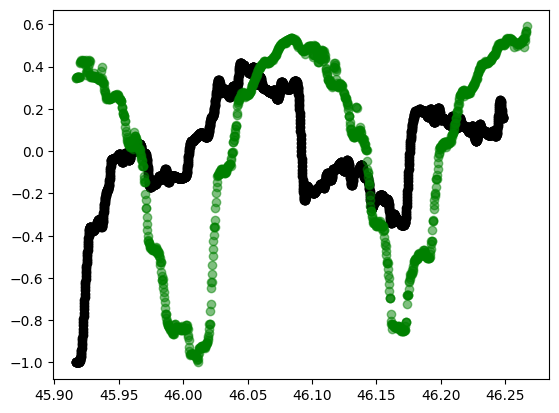

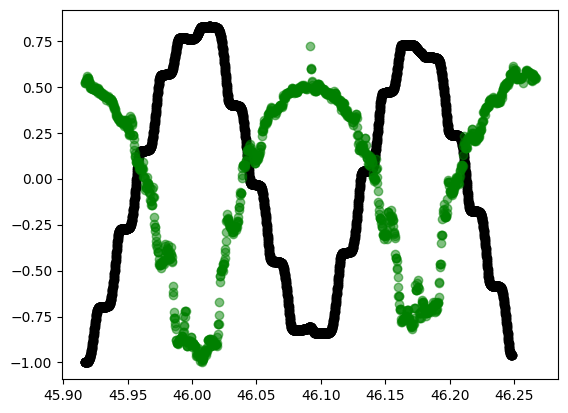

In [16]:
plot_var = 'LEFT_ANKLE'

df1 = test_mcl.copy()
df1 = add_xyz(df1)
df2 = thunder_df1.copy()
# df3 = lightning_df1.copy()

# time correction
time_int = [45 + (55.0/60), 46+(14.9/60)]
df1 = add_times(df1, time_int)

# manually remove the outliers
df2 = df2[df2['RIGHT_HIP_Y']>100]
# df3 = df3[df3['RIGHT_HIP_Y']>100]

df1 = normalize_df(df1, f'{plot_var}_X', f'{plot_var}_Y')
df2 = normalize_df(df2, f'{plot_var}_X', f'{plot_var}_Y')
# df3 = normalize_df(df3, f'{plot_var}_X', f'{plot_var}_Y')

plt.scatter(df1['time'], df1[f'{plot_var}_X'], color='black')
plt.scatter(df2['time'], -df2[f'{plot_var}_X'], color='green', alpha=.5)
# plt.scatter(df3['time'], df3[f'{plot_var}_X'], color='red', alpha=.5)
plt.show()

plt.scatter(df1['time'], df1[f'{plot_var}_Y'], color='black')
plt.scatter(df2['time'], -df2[f'{plot_var}_Y'], color='green', alpha=.5)
# plt.scatter(df3['time'], df3[f'{plot_var}_Y'], color='red', alpha=.5)
plt.show()

## Compare MCL with other things 

In [17]:
# def plot_angle_test(df, angle, coord):
#     P = world2cam(angle, coord)
#     for keypoint in mcl_keypoints:
#         df[keypoint] = df[keypoint].apply(lambda x: P@np.append(x,1))
    
#     df = add_xyz(df)

#     fig, ax = plt.subplots(1,2, figsize=(10,4))
    
#     ax[0].scatter(df['time'], df['LEFT_ANKLE_X'])
#     ax[0].set_title('Left Ankle X')
#     # plt.show()
#     ax[1].scatter(df['time'], df['LEFT_ANKLE_Y'])
#     ax[1].set_title('Left Ankle Y')
#     plt.show()

def make_angular_mcl(df, angle, coord):
    P = world2cam(angle, coord)
    for keypoint in mcl_keypoints:
        df[keypoint] = df[keypoint].apply(lambda x: -P@np.append(x,1))
    df = add_xyz(df)
    return df

mcl_1 = make_angular_mcl(og_mcl.copy(), a1, C1)
mcl_2 = make_angular_mcl(og_mcl.copy(), a2, C2)
mcl_4 = make_angular_mcl(og_mcl.copy(), a3, C3)
mcl_3 = make_angular_mcl(og_mcl.copy(), a4, C4)

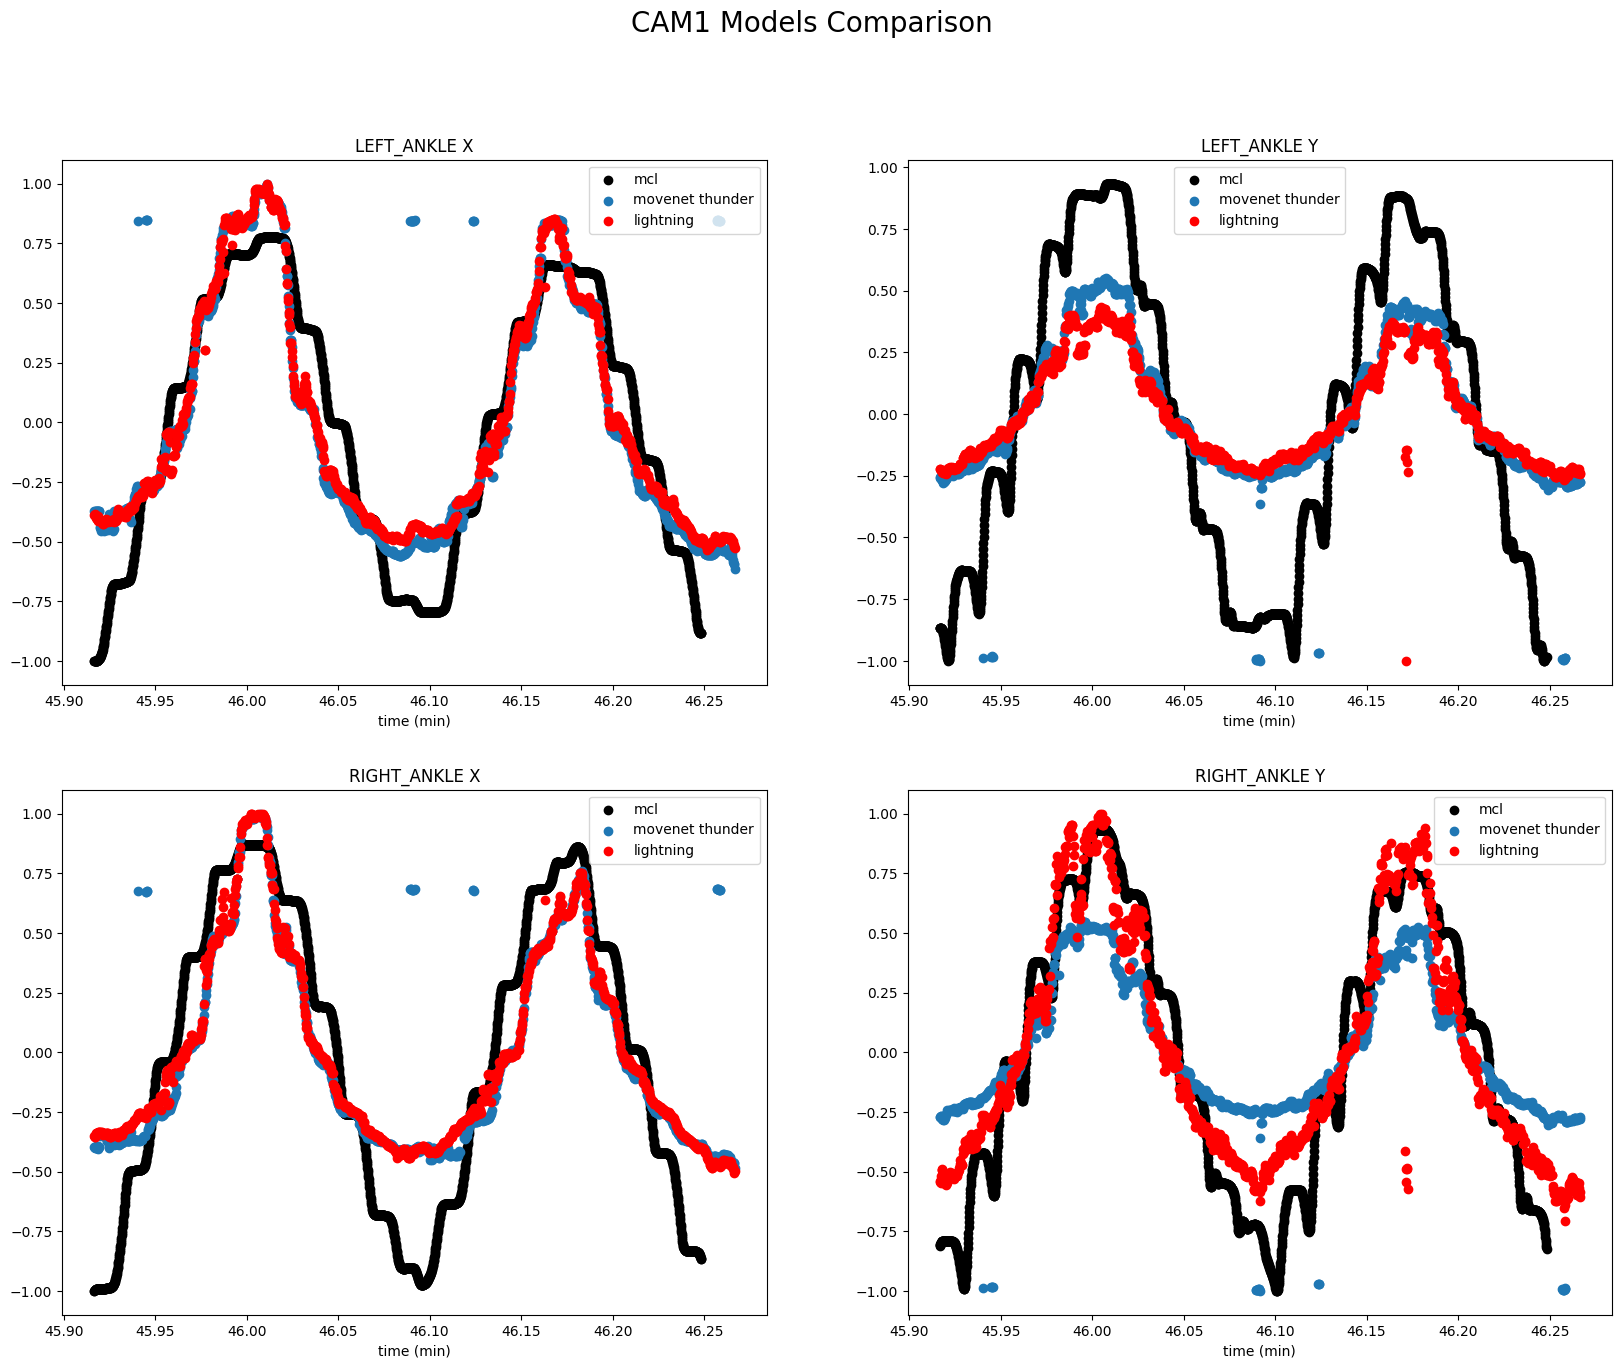

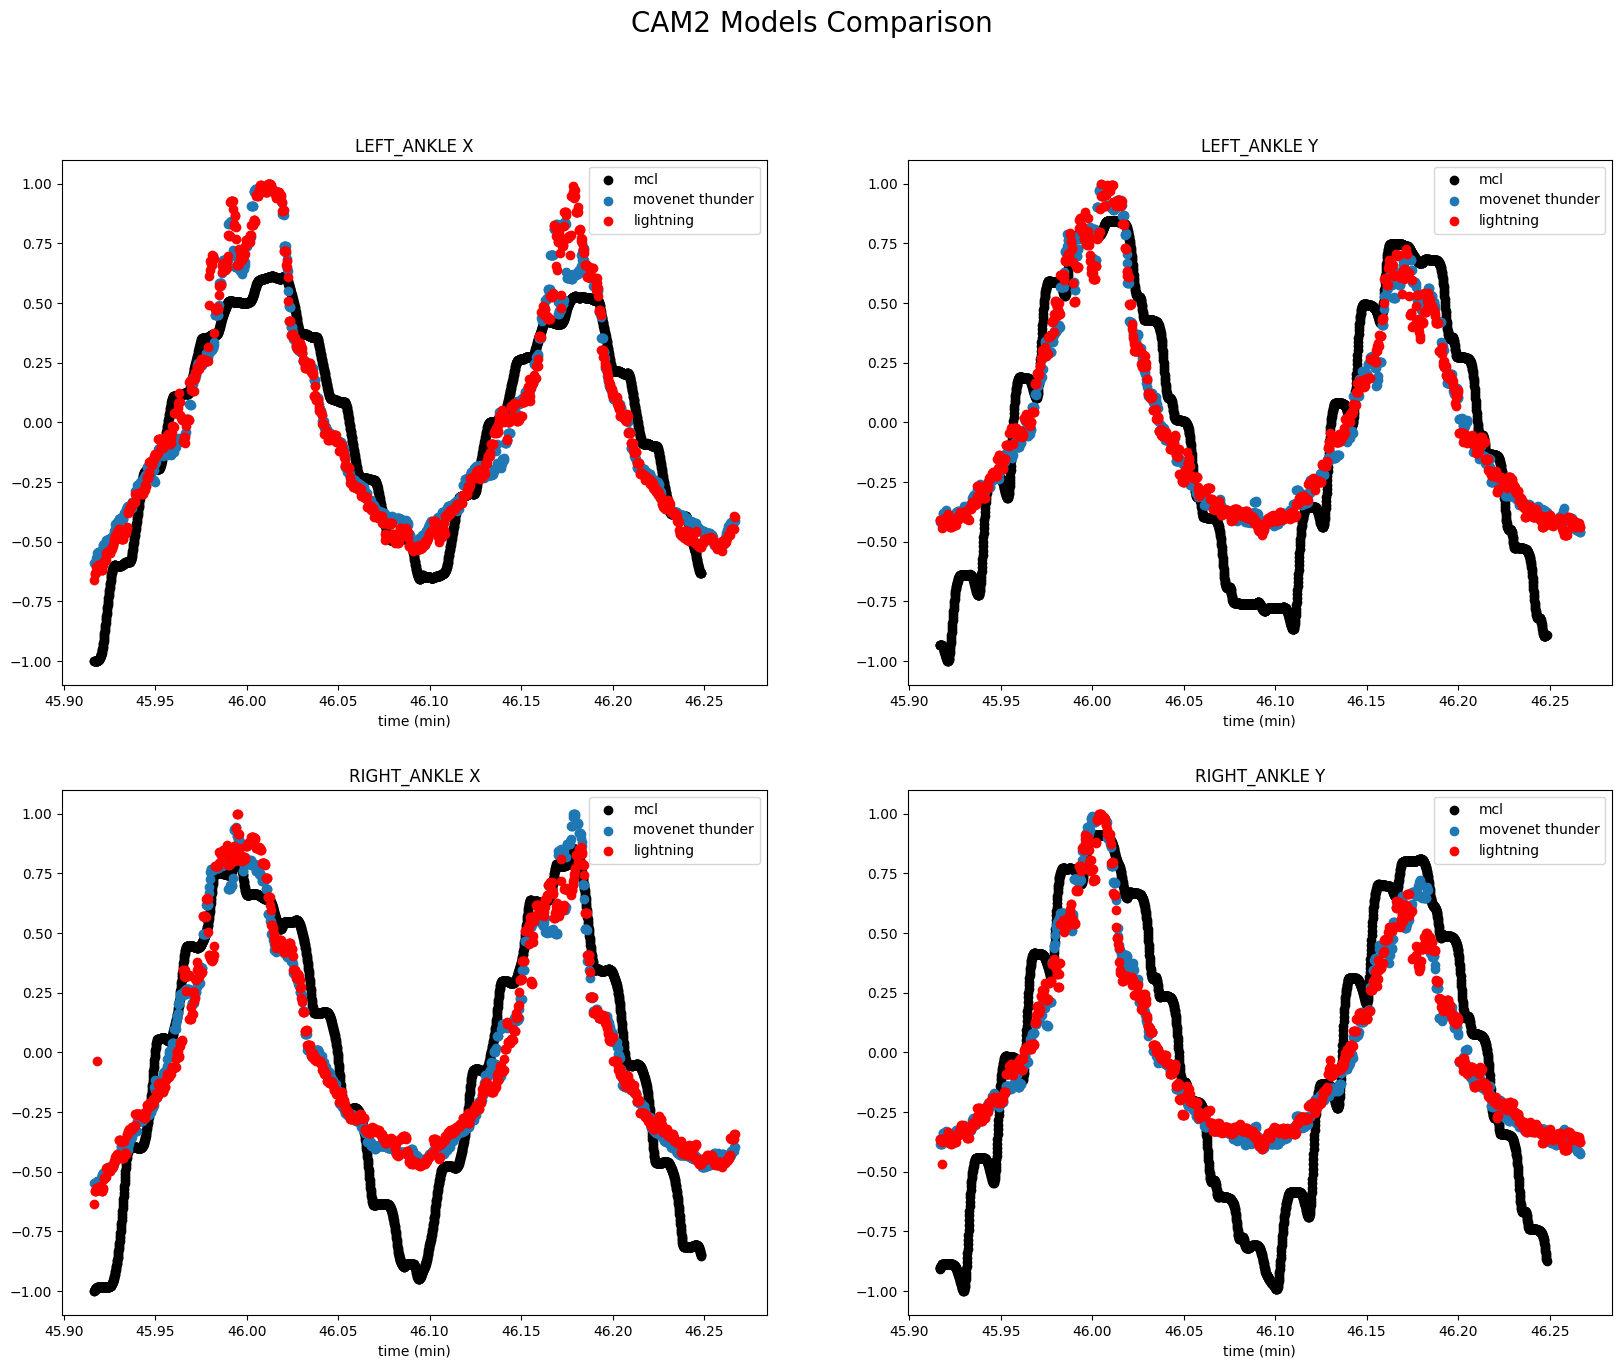

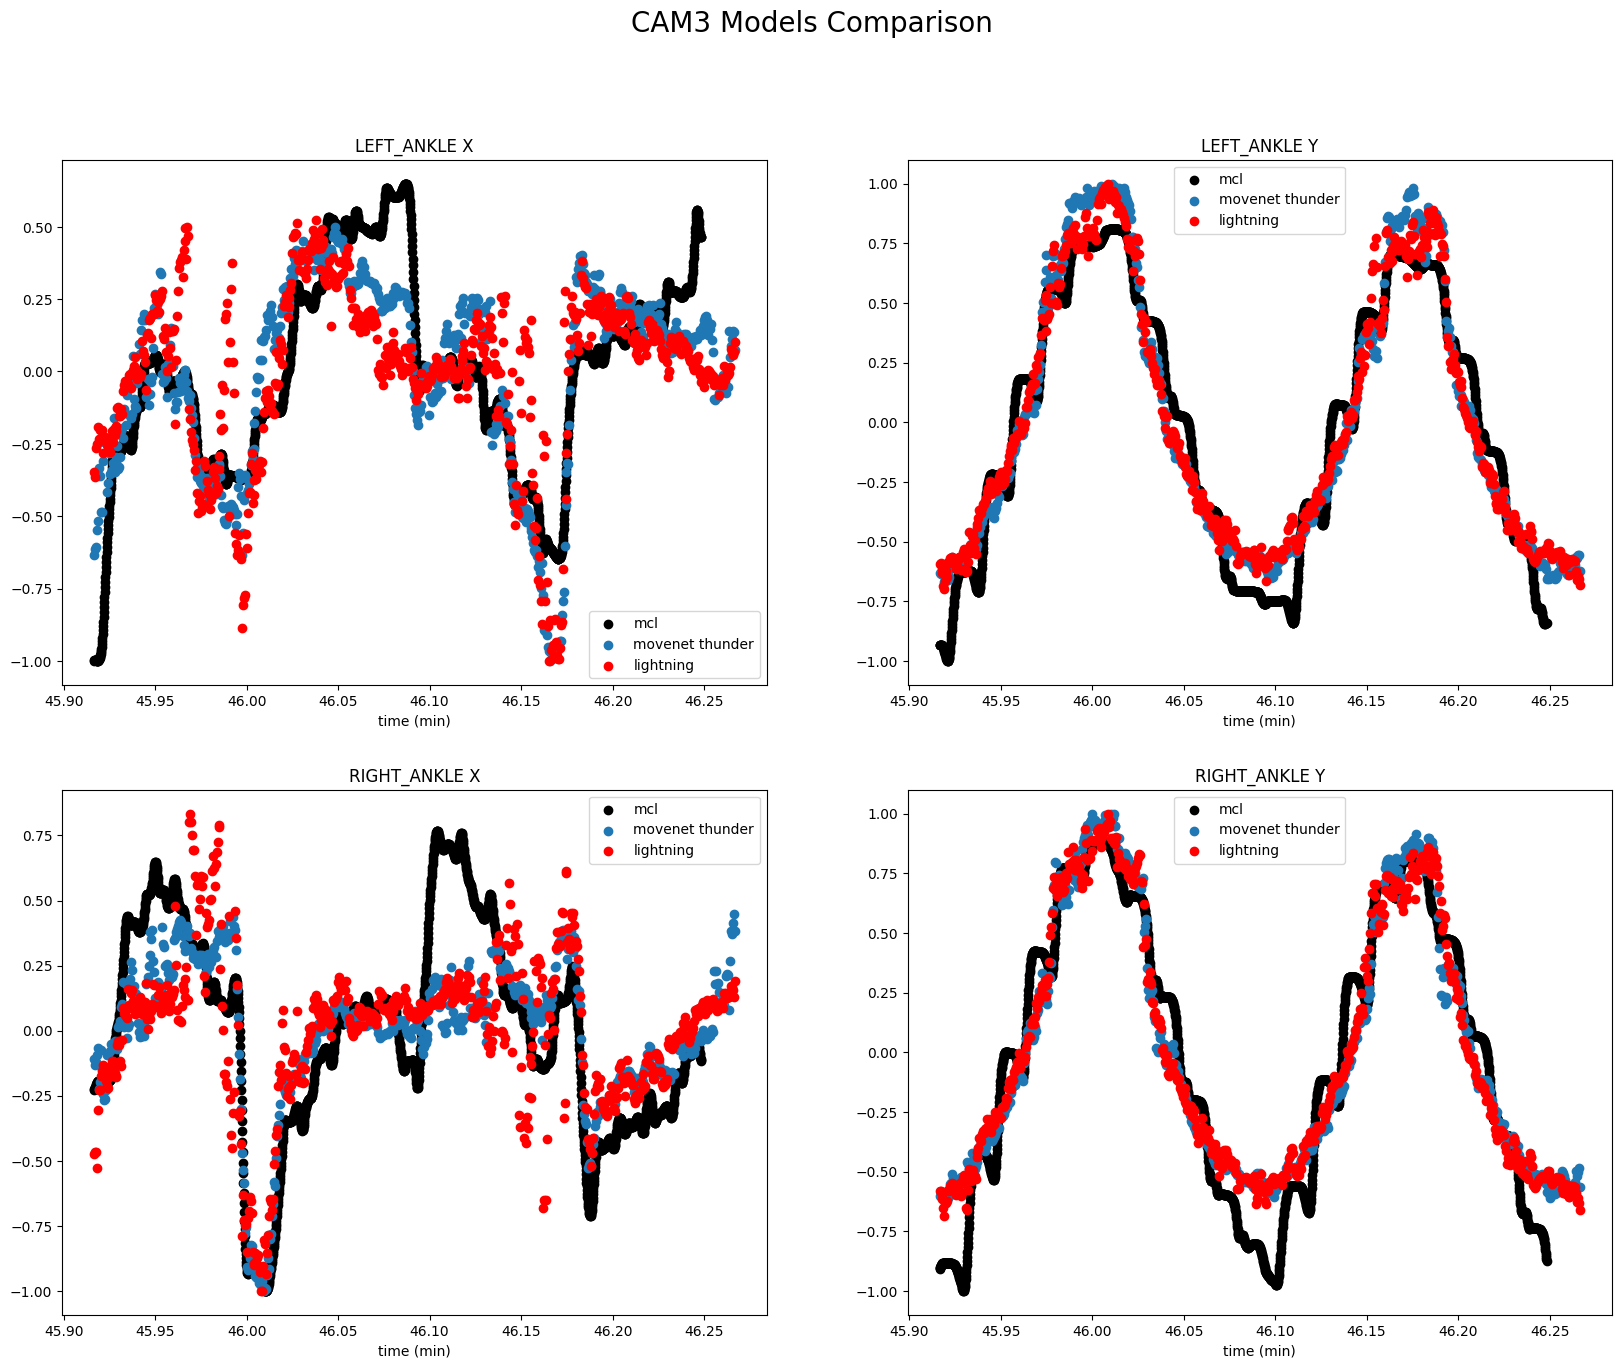

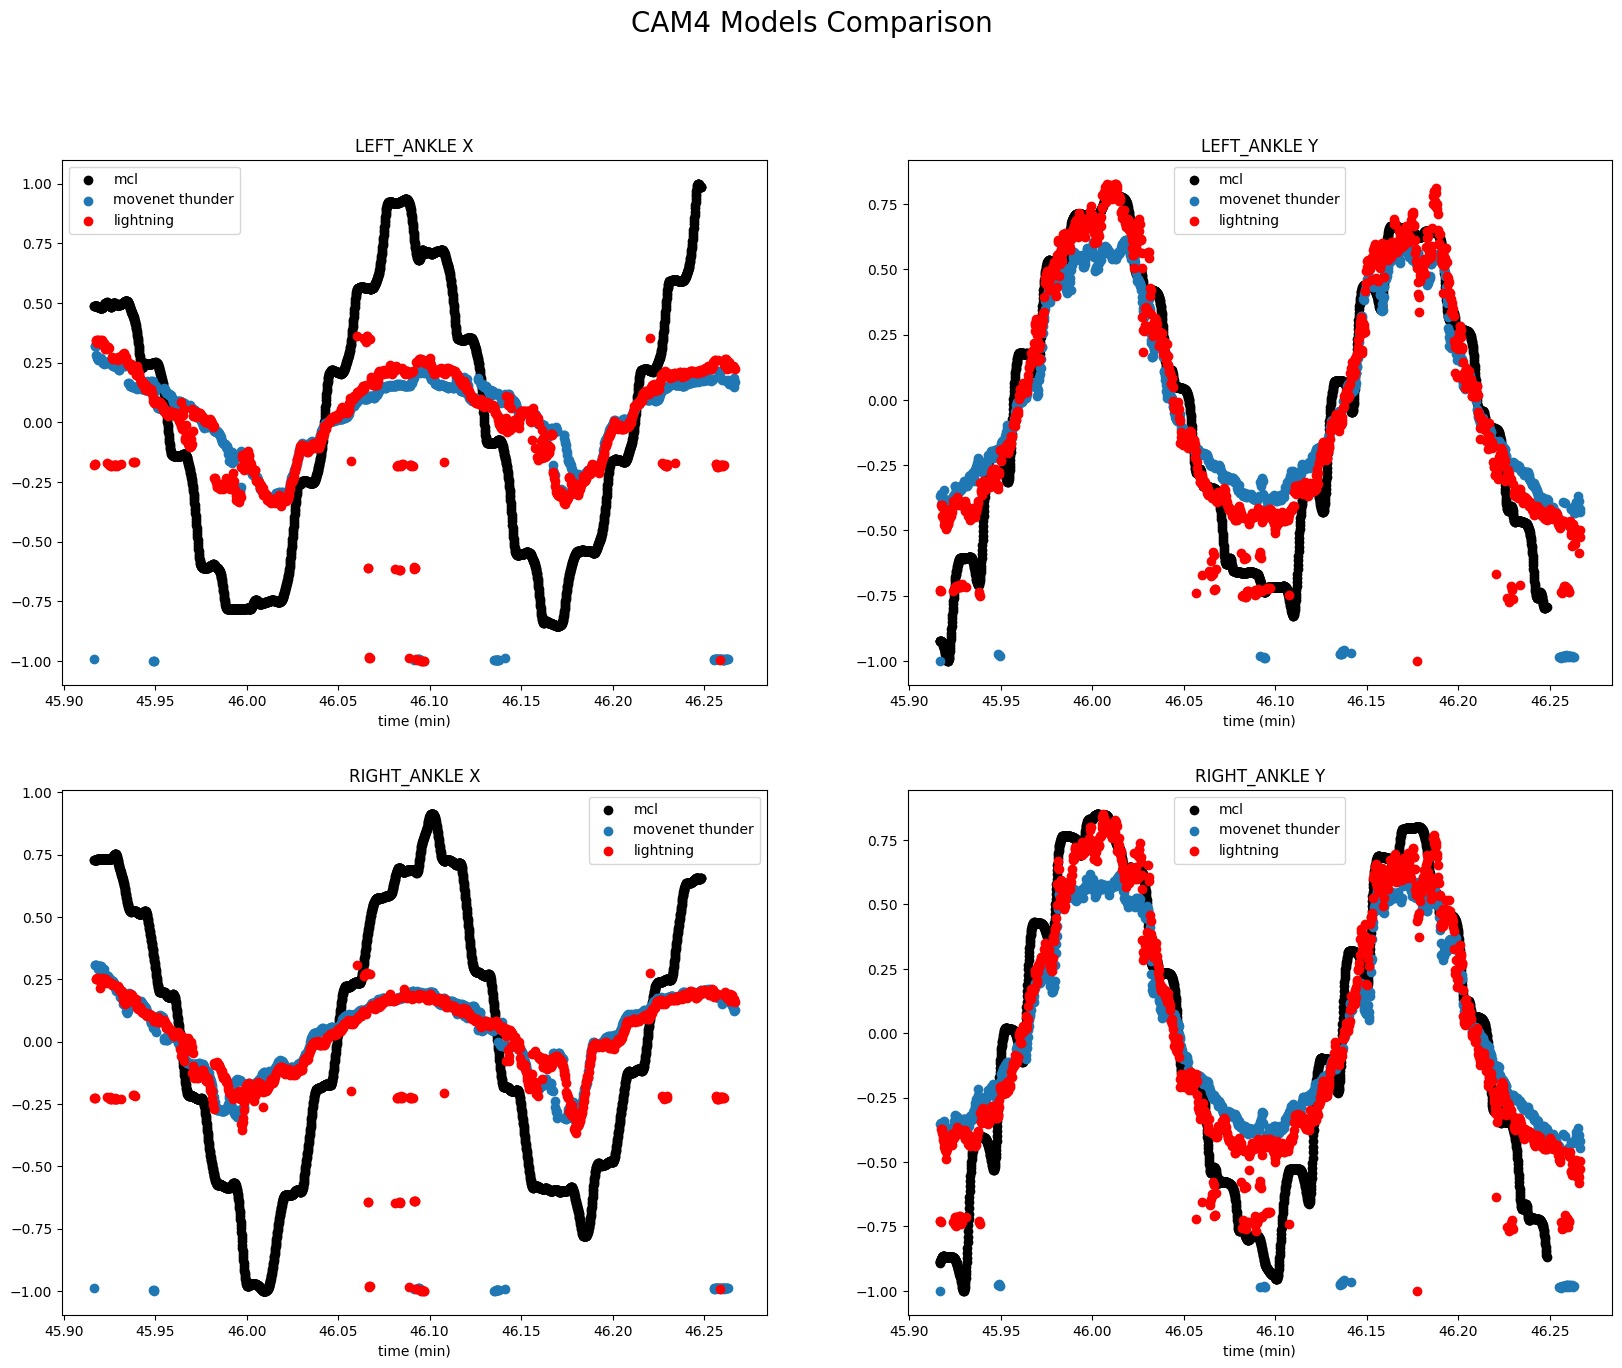

In [23]:
from utils import *

def scatter_compare(df1, df2, plot_vars, plot_title, df3=None, ):
    fig, ax = plt.subplots(nrows=len(plot_vars), ncols=2, figsize=(20,15))
    fig.suptitle(plot_title, fontsize=20)

    for i in range(len(plot_vars)):
        ax[i,0].scatter(df1['time'], df1[plot_vars[i]+'_X'], label='mcl', color='black')
        ax[i,0].scatter(df2['time'], df2[plot_vars[i]+'_X'], label='movenet thunder', color='tab:blue')
        if df3 is not None:
            ax[i,0].scatter(df3['time'], df3[plot_vars[i]+'_X'], label='lightning', color='red')
        ax[i,0].set_title(f'{plot_vars[i]} X')
        ax[i,0].set_xlabel('time (min)')
        ax[i,0].legend()

        ax[i,1].scatter(df1['time'], df1[plot_vars[i]+'_Y'], label='mcl', color='black')
        ax[i,1].scatter(df2['time'], df2[plot_vars[i]+'_Y'], label='movenet thunder', color='tab:blue')
        if df3 is not None:
            ax[i,1].scatter(df3['time'], df3[plot_vars[i]+'_Y'], label='lightning', color='red')
        ax[i,1].set_title(f'{plot_vars[i]} Y')
        ax[i,1].set_xlabel('time (min)')
        ax[i,1].legend()

    plt.show()

def prep_plot_dfs(df1, df2, df3, plot_vars):
    # time correction
    time_int = [45 + (55.0/60), 46+(14.9/60)]
    df1 = add_times(df1, time_int)

    for plot_var in plot_vars:
        df1 = normalize_df(df1, f'{plot_var}_X', f'{plot_var}_Y')
        df2 = normalize_df(df2, f'{plot_var}_X', f'{plot_var}_Y')
        df3 = normalize_df(df3, f'{plot_var}_X', f'{plot_var}_Y')

    return df1, df2, df3

plot_vars = ['LEFT_ANKLE', 'RIGHT_ANKLE']

df1, df2, df3 = mcl_1.copy(), thunder_df1.copy(), lightning_df1.copy()
df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# models_compare(df1, df2, df3, plot_vars, plot_title='CAM1 Models Comparison')
# scatter_compare(df1=df1, df2=df2, plot_vars=plot_vars, plot_title='CAM1 Models Comparison')
scatter_compare(df1=df1, df2=df2, df3=df3, plot_vars=plot_vars, plot_title='CAM1 Models Comparison')

df1, df2, df3 = mcl_2.copy(), thunder_df2.copy(), lightning_df2.copy()
for var in plot_vars:
    df2[f'{var}_X'] = -df2[f'{var}_X']
    df3[f'{var}_X'] = -df3[f'{var}_X']
df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# models_compare(df1, df2, df3, plot_vars, plot_title='CAM2 Models Comparison')
# scatter_compare(df1=df1, df2=df2, plot_vars=plot_vars, plot_title='CAM2 Models Comparison')
scatter_compare(df1=df1, df2=df2, df3=df3, plot_vars=plot_vars, plot_title='CAM2 Models Comparison')

df1, df2, df3 = mcl_3.copy(), thunder_df3.copy(), lightning_df3.copy()
for var in plot_vars:
    df2[f'{var}_X'] = -df2[f'{var}_X']
    df3[f'{var}_X'] = -df3[f'{var}_X']
df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# models_compare(df1, df2, df3, plot_vars, plot_title='CAM3 Models Comparison')
# scatter_compare(df1=df1, df2=df2, plot_vars=plot_vars, plot_title='CAM3 Models Comparison')
scatter_compare(df1=df1, df2=df2, df3=df3, plot_vars=plot_vars, plot_title='CAM3 Models Comparison')

df1, df2, df3 = mcl_4.copy(), thunder_df4.copy(), lightning_df4.copy()
df2 = df2[df2['RIGHT_HIP_Y']>100]
df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# models_compare(df1, df2, df3, plot_vars, plot_title='CAM4 Models Comparison')
# scatter_compare(df1=df1, df2=df2, plot_vars=plot_vars, plot_title='CAM4 Models Comparison')
scatter_compare(df1=df1, df2=df2, df3=df3, plot_vars=plot_vars, plot_title='CAM4 Models Comparison')

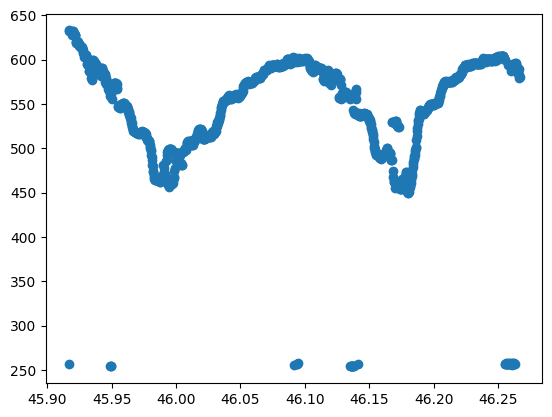

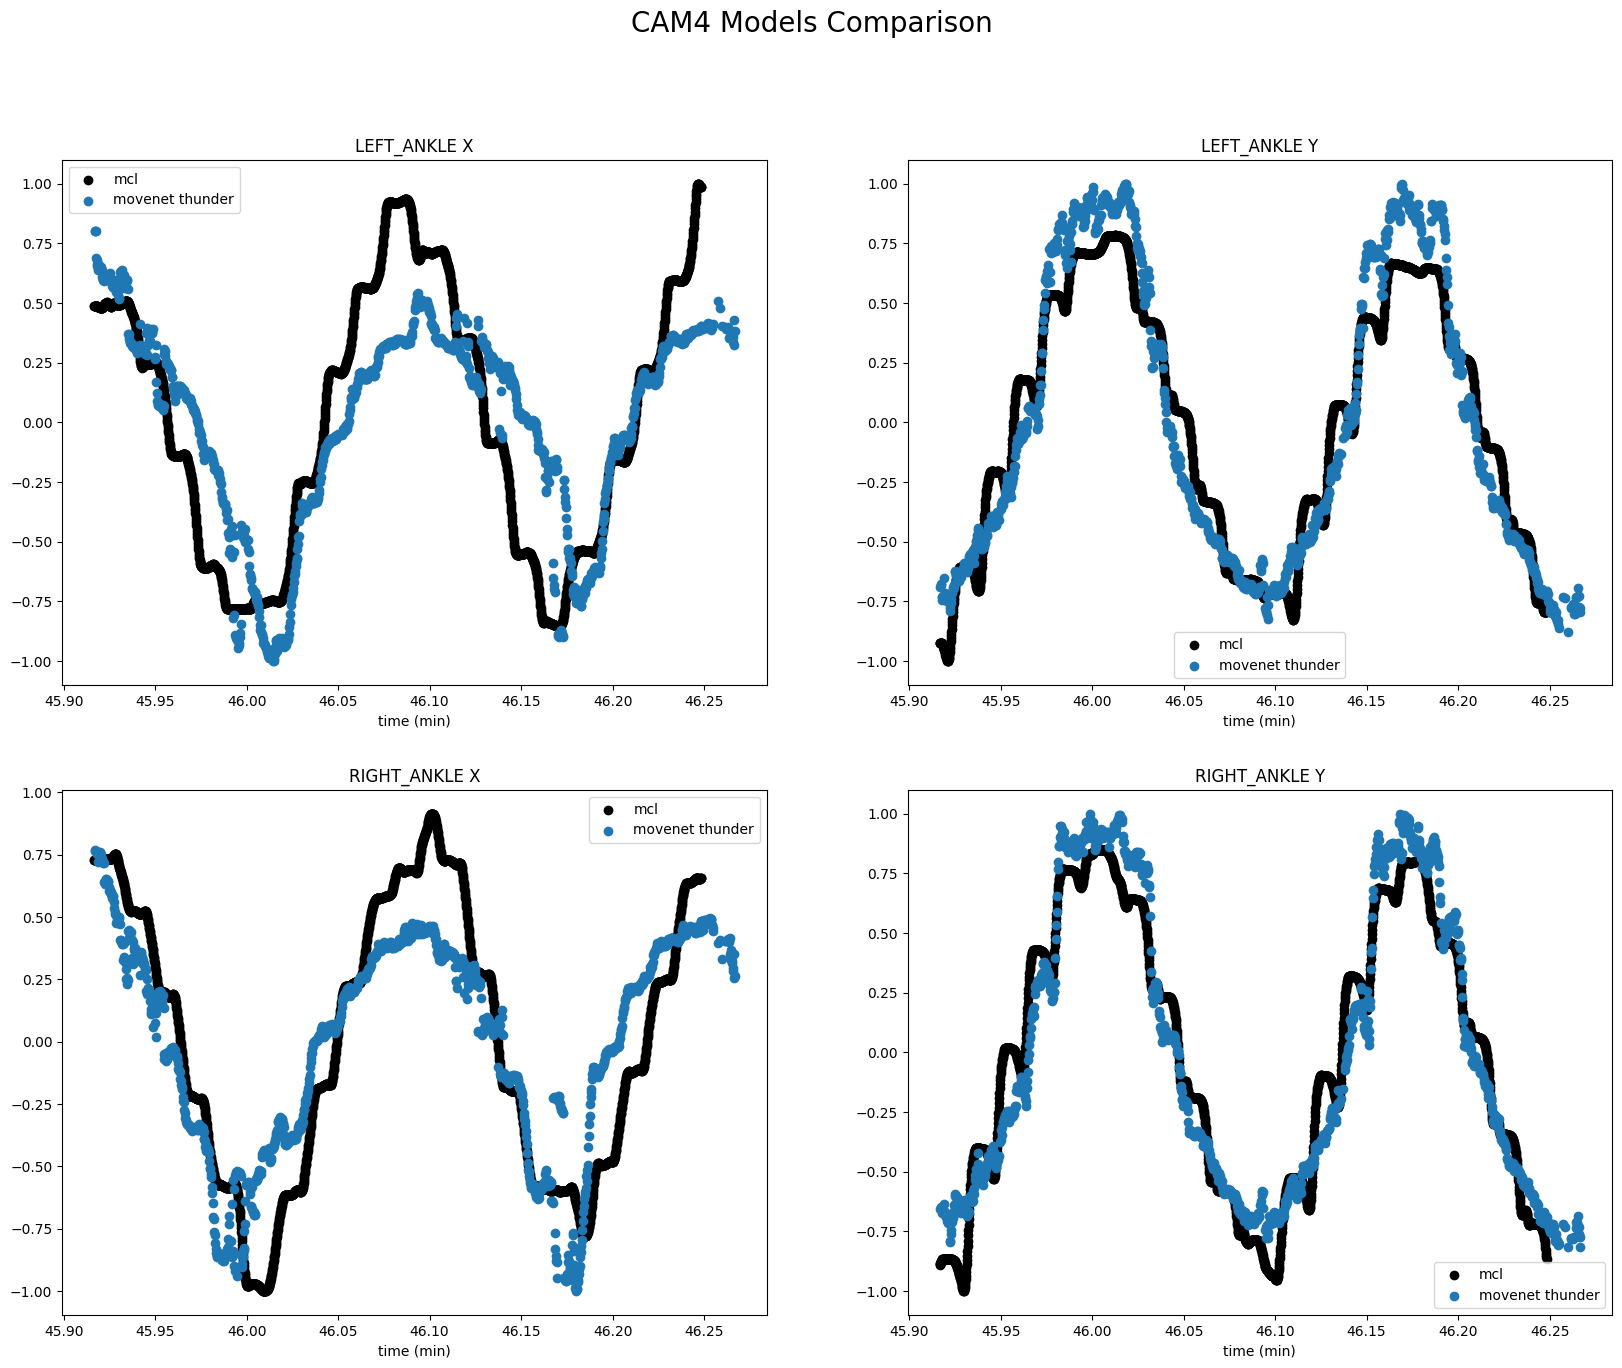

In [152]:
df1, df2, df3 = mcl_4.copy(), thunder_df4.copy(), lightning_df4.copy()
plt.scatter(df2['time'], df2['RIGHT_ANKLE_X'])
df2 = df2[df2['RIGHT_ANKLE_X']>300]
df1, df2, df3 = prep_plot_dfs(df1, df2, df3, plot_vars)
# models_compare(df1, df2, df3, plot_vars, plot_title='CAM4 Models Comparison')
scatter_compare(df1=df1, df2=df2, plot_vars=plot_vars, plot_title='CAM4 Models Comparison')

## Coral Data

In [1]:
import os
os.getcwd()

'/Users/ilonademler/Documents/Harvard/seniorfall/coral/mcl-pose-testing'

In [13]:
from utils import *

csv_file = '../mcl_experiments/coral_data/MCL_4_14/coral_images_00.csv'
kp_df = create_df_from_file(csv_file)

../mcl_experiments/coral_data/MCL_4_14/coral_images_00.csv


In [14]:
kp_df.head()

NOSE  \
0   [114.43137, 103.45098, 0.99529284, 0]   
1   [108.15686, 103.45098, 0.99559456, 1]   
2   [105.333336, 107.37255, 0.9971533, 2]   
3      [104.15686, 124.15686, 0.99507, 3]   
4  [105.803925, 117.09804, 0.99479055, 4]   

                                  LEFT_EYE  \
0     [116.2841, 100.159096, 0.9882053, 0]   
1     [113.126465, 99.5659, 0.98455644, 1]   
2   [109.249886, 103.45618, 0.98689437, 2]   
3  [106.918205, 120.529106, 0.98121876, 3]   
4      [109.93468, 113.5445, 0.9675931, 4]   

                                RIGHT_EYE  \
0     [108.29541, 100.03151, 0.988361, 0]   
1     [103.79879, 99.04016, 0.9936667, 1]   
2   [100.51898, 103.04458, 0.99531496, 2]   
3     [99.50071, 119.59647, 0.9907094, 3]   
4  [102.580444, 113.19721, 0.98440117, 4]   

                                LEFT_EAR  \
0   [121.00398, 104.832436, 0.636603, 0]   
1   [117.8008, 104.90002, 0.72335327, 1]   
2   [111.82671, 107.310486, 0.522581, 2]   
3  [109.320885, 123.06332, 0.5090741, 3]   
4   [114.11359, 116.5213, 0.62089074, 4]   

                              RIGHT_EAR  \
0  [101.14185, 103.8518, 0.92813164, 0]   
1  [96.044464, 102.97757, 0.9597609, 1]   
2  [93.60831, 105.600746, 0.9459745, 2]   
3  [93.319374, 121.59912, 0.9267335, 3]   
4  [95.692535, 114.22622, 0.8874901, 4]   

                            LEFT_SHOULDER  \
0  [127.536705, 133.31349, 0.99739194, 0]   
1    [123.52777, 133.76845, 0.9971631, 1]   
2  [119.224495, 134.32248, 0.99742585, 2]   
3   [114.19222, 146.04301, 0.99717087, 3]   
4    [118.78537, 141.63936, 0.9970976, 4]   

                          RIGHT_SHOULDER  \
0  [92.540085, 128.29953, 0.99741036, 0]   
1    [87.22049, 128.33432, 0.9974003, 1]   
2   [84.25957, 132.10043, 0.99712914, 2]   
3   [84.087944, 143.26927, 0.9968209, 3]   
4   [84.57646, 138.59593, 0.99722856, 4]   

                               LEFT_ELBOW  \
0    [132.70135, 165.84723, 0.9943997, 0]   
1  [127.832214, 165.30693, 0.99472827, 1]   
2   [125.88561, 166.31534, 0.99080527, 2]   
3   [119.484764, 173.98239, 0.9906653, 3]   
4   [123.27999, 169.80229, 0.99097615, 4]   

                            RIGHT_ELBOW                            LEFT_WRIST  \
0  [81.201256, 158.6325, 0.99711096, 0]  [136.92642, 194.29015, 0.9842126, 0]   
1  [79.31042, 159.94135, 0.99721515, 1]  [133.48882, 194.75917, 0.9754725, 1]   
2  [80.22973, 165.63866, 0.99616003, 2]  [129.48671, 194.90141, 0.9889207, 2]   
3   [80.43904, 170.78188, 0.9929744, 3]  [121.94257, 197.54558, 0.9858496, 3]   
4  [79.84572, 168.20908, 0.99572456, 4]  [127.63775, 194.8096, 0.99009573, 4]   

                            RIGHT_WRIST  \
0  [89.873314, 182.5624, 0.99600524, 0]   
1   [86.77327, 185.61237, 0.9962232, 1]   
2   [80.34693, 192.00916, 0.9904248, 2]   
3   [77.45481, 194.3148, 0.97682947, 3]   
4  [75.953094, 192.55466, 0.9867556, 4]   

                                LEFT_HIP  \
0    [122.7887, 200.06682, 0.9956611, 0]   
1  [119.226036, 197.09924, 0.9926427, 1]   
2   [113.15337, 198.17668, 0.9971137, 2]   
3   [108.08564, 197.82925, 0.9973363, 3]   
4  [109.805756, 200.75026, 0.9970697, 4]   

                              RIGHT_HIP  \
0  [99.40963, 196.22792, 0.99668294, 0]   
1    [97.96255, 194.71762, 0.996573, 1]   
2   [94.77666, 197.53036, 0.9973609, 2]   
3  [89.690445, 196.82108, 0.9974023, 3]   
4  [90.829384, 198.75943, 0.9969222, 4]   

                                LEFT_KNEE  \
0  [122.853676, 254.81012, 0.99386555, 0]   
1    [119.11374, 250.07883, 0.9842755, 1]   
2   [116.87388, 251.68346, 0.99585354, 2]   
3  [106.336555, 242.61545, 0.99361366, 3]   
4    [107.36976, 245.44162, 0.9953875, 4]   

                             RIGHT_KNEE  \
0  [99.17738, 250.62434, 0.99176764, 0]   
1   [98.85016, 245.98724, 0.9787617, 1]   
2    [96.78916, 252.59709, 0.995663, 2]   
3   [89.31325, 240.46497, 0.9946985, 3]   
4    [93.99584, 245.52174, 0.991285, 4]   

                               LEFT_ANKLE  \
0    [122.82697, 305.63614, 0.9526329, 0] 

In [19]:
def split_x_y_frame(coral_df):
    # x and y vals
    coral_df['frame'] = coral_df['NOSE'].apply(lambda x: x[-1])
    for kp in keypoints:
        coral_df[f'{kp}_X'] = coral_df.apply(lambda row: np.float(row[kp][0]), axis=1)
        coral_df[f'{kp}_Y'] = coral_df.apply(lambda row: np.float(row[kp][1]), axis=1)
    #  delete clunk   
    for kp in keypoints:
        del coral_df[kp]
    return coral_df
    
kp_df = split_x_y_frame(kp_df)


/var/folders/yr/ygd5c52d1f9gkfjtd69mk1n40000gn/T/ipykernel_35100/2431883596.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coral_df[f'{kp}_X'] = coral_df.apply(lambda row: np.float(row[kp][0]), axis=1)
/var/folders/yr/ygd5c52d1f9gkfjtd69mk1n40000gn/T/ipykernel_35100/2431883596.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coral

In [37]:
time_int = [45 + (55.5/60), 46+(16.5/60)]
kp_df = add_times(kp_df, time_int)
kp_df.head()

# plt.scatter(kp_df['time'])

frame      NOSE_X     NOSE_Y  LEFT_EYE_X  LEFT_EYE_Y  RIGHT_EYE_X  \
0      0  114.431370  103.45098  116.284100  100.159096   108.295410   
1      1  108.156860  103.45098  113.126465   99.565900   103.798790   
2      2  105.333336  107.37255  109.249886  103.456180   100.518980   
3      3  104.156860  124.15686  106.918205  120.529106    99.500710   
4      4  105.803925  117.09804  109.934680  113.544500   102.580444   

   RIGHT_EYE_Y  LEFT_EAR_X  LEFT_EAR_Y  RIGHT_EAR_X  ...  LEFT_KNEE_X  \
0    100.03151  121.003980  104.832436   101.141850  ...   122.853676   
1     99.04016  117.800800  104.900020    96.044464  ...   119.113740   
2    103.04458  111.826710  107.310486    93.608310  ...   116.873880   
3    119.59647  109.320885  123.063320    93.319374  ...   106.336555   
4    113.19721  114.113590  116.521300    95.692535  ...   107.369760   

   LEFT_KNEE_Y  RIGHT_KNEE_X  RIGHT_KNEE_Y  LEFT_ANKLE_X  LEFT_ANKLE_Y  \
0    254.81012      99.17738     250.62434    122.826970     305.63614   
1    250.07883      98.85016     245.98724    122.385680     302.03120   
2    251.68346      96.78916     252.59709    106.689370     295.16330   
3    242.61545      89.31325     240.46497    106.107704     283.20535   
4    245.44162      93.99584     245.52174    105.576560     286.09116   

   RIGHT_ANKLE_X  RIGHT_ANKLE_Y       time   time_int  
0      98.576850      299.41263  45.925000  45.925000  
1     103.255424      298.42180  45.928535  45.928535  
2      97.987550      297.62213  45.932071  45.932071  
3      88.351570      281.90270  45.935606  45.935606  
4      93.069880      287.03827  45.939141  45.939141  

[5 rows x 37 columns]

In [38]:
kp_df.head()

frame      NOSE_X     NOSE_Y  LEFT_EYE_X  LEFT_EYE_Y  RIGHT_EYE_X  \
0      0  114.431370  103.45098  116.284100  100.159096   108.295410   
1      1  108.156860  103.45098  113.126465   99.565900   103.798790   
2      2  105.333336  107.37255  109.249886  103.456180   100.518980   
3      3  104.156860  124.15686  106.918205  120.529106    99.500710   
4      4  105.803925  117.09804  109.934680  113.544500   102.580444   

   RIGHT_EYE_Y  LEFT_EAR_X  LEFT_EAR_Y  RIGHT_EAR_X  ...  LEFT_KNEE_X  \
0    100.03151  121.003980  104.832436   101.141850  ...   122.853676   
1     99.04016  117.800800  104.900020    96.044464  ...   119.113740   
2    103.04458  111.826710  107.310486    93.608310  ...   116.873880   
3    119.59647  109.320885  123.063320    93.319374  ...   106.336555   
4    113.19721  114.113590  116.521300    95.692535  ...   107.369760   

   LEFT_KNEE_Y  RIGHT_KNEE_X  RIGHT_KNEE_Y  LEFT_ANKLE_X  LEFT_ANKLE_Y  \
0    254.81012      99.17738     250.62434    122.826970     305.63614   
1    250.07883      98.85016     245.98724    122.385680     302.03120   
2    251.68346      96.78916     252.59709    106.689370     295.16330   
3    242.61545      89.31325     240.46497    106.107704     283.20535   
4    245.44162      93.99584     245.52174    105.576560     286.09116   

   RIGHT_ANKLE_X  RIGHT_ANKLE_Y       time   time_int  
0      98.576850      299.41263  45.925000  45.925000  
1     103.255424      298.42180  45.928535  45.928535  
2      97.987550      297.62213  45.932071  45.932071  
3      88.351570      281.90270  45.935606  45.935606  
4      93.069880      287.03827  45.939141  45.939141  

[5 rows x 37 columns]

(0.0, 640.0)

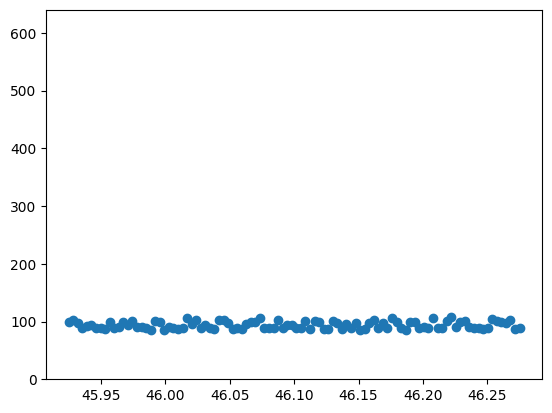

In [39]:
plt.scatter(kp_df['time'], kp_df['RIGHT_ANKLE_X'])
plt.ylim(0, 640)

In [24]:
print(keypoints)
print(kp_df.keys())

['NOSE', 'LEFT_EYE', 'RIGHT_EYE', 'LEFT_EAR', 'RIGHT_EAR', 'LEFT_SHOULDER', 'RIGHT_SHOULDER', 'LEFT_ELBOW', 'RIGHT_ELBOW', 'LEFT_WRIST', 'RIGHT_WRIST', 'LEFT_HIP', 'RIGHT_HIP', 'LEFT_KNEE', 'RIGHT_KNEE', 'LEFT_ANKLE', 'RIGHT_ANKLE']
Index(['frame', 'NOSE_X', 'NOSE_Y', 'LEFT_EYE_X', 'LEFT_EYE_Y', 'RIGHT_EYE_X',
       'RIGHT_EYE_Y', 'LEFT_EAR_X', 'LEFT_EAR_Y', 'RIGHT_EAR_X', 'RIGHT_EAR_Y',
       'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y', 'RIGHT_SHOULDER_X',
       'RIGHT_SHOULDER_Y', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'RIGHT_ELBOW_X',
       'RIGHT_ELBOW_Y', 'LEFT_WRIST_X', 'LEFT_WRIST_Y', 'RIGHT_WRIST_X',
       'RIGHT_WRIST_Y', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'RIGHT_HIP_X',
       'RIGHT_HIP_Y', 'LEFT_KNEE_X', 'LEFT_KNEE_Y', 'RIGHT_KNEE_X',
       'RIGHT_KNEE_Y', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'RIGHT_ANKLE_X',
       'RIGHT_ANKLE_Y'],
      dtype='object')


In [25]:
pose = kp_df.iloc[0]
print(pose)

frame                 0.000000
NOSE_X              114.431370
NOSE_Y              103.450980
LEFT_EYE_X          116.284100
LEFT_EYE_Y          100.159096
RIGHT_EYE_X         108.295410
RIGHT_EYE_Y         100.031510
LEFT_EAR_X          121.003980
LEFT_EAR_Y          104.832436
RIGHT_EAR_X         101.141850
RIGHT_EAR_Y         103.851800
LEFT_SHOULDER_X     127.536705
LEFT_SHOULDER_Y     133.313490
RIGHT_SHOULDER_X     92.540085
RIGHT_SHOULDER_Y    128.299530
LEFT_ELBOW_X        132.701350
LEFT_ELBOW_Y        165.847230
RIGHT_ELBOW_X        81.201256
RIGHT_ELBOW_Y       158.632500
LEFT_WRIST_X        136.926420
LEFT_WRIST_Y        194.290150
RIGHT_WRIST_X        89.873314
RIGHT_WRIST_Y       182.562400
LEFT_HIP_X          122.788700
LEFT_HIP_Y          200.066820
RIGHT_HIP_X          99.409630
RIGHT_HIP_Y         196.227920
LEFT_KNEE_X         122.853676
LEFT_KNEE_Y         254.810120
RIGHT_KNEE_X         99.177380
RIGHT_KNEE_Y        250.624340
LEFT_ANKLE_X        122.826970
LEFT_ANK

In [28]:
pose['NOSE_X'], pose['NOSE_Y']

(114.43137, 103.45098)

NOSE
LEFT_EYE
RIGHT_EYE
LEFT_EAR
RIGHT_EAR
LEFT_SHOULDER
RIGHT_SHOULDER
LEFT_ELBOW
RIGHT_ELBOW
LEFT_WRIST
RIGHT_WRIST
LEFT_HIP
RIGHT_HIP
LEFT_KNEE
RIGHT_KNEE
LEFT_ANKLE
RIGHT_ANKLE


(480.0, 0.0)

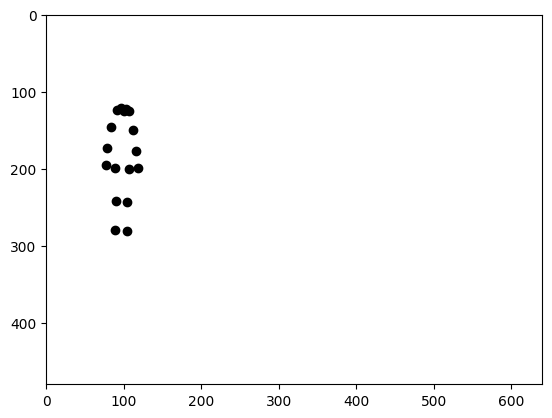

In [35]:
pose = kp_df.iloc[10]

for kp in keypoints:
    print(kp)
    plt.scatter(pose[f'{kp}_X'], pose[f'{kp}_Y'], color='black')

plt.xlim([0, 640])
plt.ylim([480, 0])